## Latar Belakang

Sebuah perusahaan yang bergerak di bidang retail, ingin merekrut data scientist.
Perusahaan ingin melakukan riset kepada seluruh pengunjung toko selama 2 tahun terakhir dari tahun 2012 sampai 2014. Banyak pengunjung yang berbelanja berbagai kebutuhan sehari-hari. 

## Pernyataan Masalah

Perusahaan ingin mengetahui data pengunjung dan data penjualan selama 2 tahun terakhir. Informasi ini akan membantu perusahaan untuk melihat penjualan produk yang sesuai dengan kebutuhan pengunjung, meningkatkan penjualan dan membantu dalam strategi penjualan kedepannya.

Sebagai seorang data analyst, kita akan mencoba menjawab pertanyaan berikut :

1. Bagaimana demografi pengunjung yang berbelanja selama 2 tahun terakhir?
2. Bagaimana penjualan setiap produk berdasarkan karakteristik pengunjung?
3. Bagaimana pengaruh promosi terhadap penjualan?
4. Channel penjualan mana yang paling banyak terjadinya penjualan?

## **1. Data**

Untuk menjawab pertanyaan di atas, kita akan menganalisa data Pengunjung dan penjualan yang sudah dikumpulkan oleh perusahaan.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, kruskal

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait Pengunjung, Produk, Promotion, dan Place. Ada 28 kolom di dalam dataset Supermarket Customers, yaitu:

**Pengunjung**
- ID : ID unik untuk tiap kandidat
- Year_Birth : Tahun kelahiran pengunjung
- Education : Status pendidikan pengunjung
- Martial_Status : Status Pernikahan pengunjung
- Income : Pendapatan per bulan pengunjung
- Kidhome : jumlah anak balita di keluarga pengunjung
- Teenhome : Jumlah remaja dalam rumah tangga pelanggan
- Dt_Customer : Tanggal pendaftaran pelanggan dengan perusahaan
- Recency : Jumlah hari sejak pembelian terakhir pelanggan
- Complain: Keluhan pelanggan dalam 2 tahun terakhir

**Produk**
- MntWines: Jumlah yang dihabiskan untuk wine dalam 2 tahun terakhir
- MntFruits: Jumlah yang dibelanjakan untuk buah-buahan dalam 2 tahun terakhir
- MntMeatProducts: Jumlah yang dihabiskan untuk membeli daging dalam 2 tahun terakhir
- MntFishProducts: Jumlah yang dihabiskan untuk ikan dalam 2 tahun terakhir
- MntSweetProducts: Jumlah yang dihabiskan untuk makanan manis dalam 2 tahun terakhir
- MntGoldProds: Jumlah yang dibelanjakan untuk emas dalam 2 tahun terakhir

**Promosi**
- NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
- AcceptedCmp1: Pelanggan yang menerima penawaran pada kampanye pertama
- AcceptedCmp2: Pelanggan yang menerima penawaran pada kampanye kedua
- AcceptedCmp3: Pelanggan yang menerima penawaran pada kampanye ketiga
- AcceptedCmp4: Pelanggan yang menerima penawaran pada kampanye keempat
- AcceptedCmp5: Pelanggan yang menerima penawaran pada kampanye kelima
- Response: Pelanggan yang menerima penawaran di kampanye terakhir

**Web Purchases**
- NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
- NumCatalogPurchases: Jumlah pembelian yang dilakukan dengan menggunakan katalog
- NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
- NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam satu bulan terakhir

Berikut 5 baris teratas dan kebawah dari dataset Supermarket Customers

In [3]:
df = pd.read_csv("Supermarket Customers.csv")
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/8/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/1/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13/6/2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/1/2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24/1/2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15/10/2012,40,84,...,7,0,0,0,0,0,0,3,11,1


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umur dari dataset Supermarket Customers.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- Dataset berisi 29 kolom dan 2240 baris yang terdiri dari beberapa tipe data yaitu integer, object, dan float
- terdapat 24 missing value di kolom Income yang akan diselidiki lebih lanjut
- kolom Dt_Customer bertipe object, kita akan mengganti tipe data nya menjadi datetime

In [5]:
display(df.describe().transpose(), df.describe(include='object'))

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31/8/2012
freq,1127,864,12


In [6]:
pd.set_option('display.max_colwidth', 0)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[4/9/2012, 8/3/2014, 21/8/2013, 10/2/2014, 19/1/2014, 9/9/2013, 13/11/2012, 8/5/2013, 6/6/2013, 13/3/2014, 15/11/2013, 10/10/2012, 24/11/2012, 24/12/2012, 31/8/2012, 28/3/2013, 3/11/2012, 8/8/2012, 6/1/2013, 23/12/2012, 11/1/2014, 18/3/2013, 2/1/2013, 27/5/2013, 20/2/2013, 31/5/2013, 22/11/2013, 22/5/2014, 11/5/2013, 29/10/2012, 29/8/2013, 31/12/2013, 2/9/2013, 11/2/2014, 1/2/2013, 29/4/2013, 12/3/2013, 5/11/2013, 2/10/2013, 28/6/2014, 9/11/2012, 24/5/2013, 1/1/2014, 8/11/2012, 12/5/2014, 11/8/2012, 7/6/2014, 12/6/2013, 19/11/2012, 2/4/2013, 28/4/2014, 17/6/2013, 3/3/2014, 4/7/2013, 7/9/2012, 18/2/2013, 11/6/2013, 6/12/2013, 21/5/2013, 11/5/2014, 19/3/2014, 27/9/2013, 8/4/2013, 11/9/2012, 14/9/2012, 17/3/2013, 5/4/2013, 30/4/2014, 19/12/2012, 27/8/2012, 12/10/2012, 4/9/2013, 29/8/2012, 23/6/2013, 3/7/2013, 25/2/2014, 11/8/2013, 16/7/2013, 28/5/2014, 21/1/2014, 27/5/2014, 23/11/2013, 23/3/2014, 24/5/2014, 22/11/2012, 11/4/2013, 1/12/2013, 20/6/2013, 23/7/2013, 30/3/2014, 20/4/2013, 17/5/2013, 8/5/2014, 10/12/2013, 24/9/2013, 2/2/2013, 7/12/2012, 2/11/2013, 10/11/2012, 25/6/2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 328, 984, 295, 447, 712, 452, 523, 546, 398, 10, 688, 247, 856, 496, 25, 258, 565, 2, 721, 1032, 577, 64, 1

Secara umum, kita bisa melihat bahwa :
- Dataset Supermarket Customer memiliki 28 kolom dan 2240 baris
- Kolom **Income** memiliki data kosong. Data kosong pada kolom tersebut diwakili dengan NaN.
- Dalam kolom **Income** terdapat 1 data anomali dengan nilai 666.666 akan dihapus dengan pertimbangan agar tidak mempengaruhi distribusi data
- Kolom **Education** berisikan variabel yaitu **Graduation**, **Master**, **PhD**, **2nd Cycle**, **Basic**. Variabel **2nd Cycle** digabungkan ke variabel **Master** karena memiliki makna yang sama dan agar memudahkan analisis. Variabel **Basic** diubah menjadi **Primary School** agar sesuai dengan maksud dari kolom **Education** yang menjelaskan pendidikan.
- Kolom **Marital_Status** terdapat kelompok variabel yang kurang tepat seperti **YOLO**, **Together**, **Widow**, **Absurd**,**Alone** , sehingga untuk variabel tersebut akan dimasukkan kedalam variabel yang lebih mewakili.
- **Dt_Costumer** memiliki data tipe object. Dari penjelasannya, kolom ini seharusanya bertipe Date,Time
- Terdapat kolom yang memiliki 1 unique value, yaitu kolom **Z_Revenue** dan **Z_Costcontact**. Maka karena tidak bisa di interpretasikan kolom di hapus
- Penambahan kolom **Age** yang di ambil dari kolom **Year_birth** agar lebih mudah dalam analisa
- Merubah nama kolom agar lebih relevan

## **Cleansing Data**

### Missing Value

In [7]:
# Persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Secara garis besar:

- missing value hanya ada di kolom 'Income'
- Jumlah missing value di kolom Income ada 24 data (1.07%). Dikarenakan data missing value yang terbilang sedikit.

Ada 2 cara untuk menangani *missing value*:

- Pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini tidak disarankan.
- Kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi *missing value*, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenaranya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan angka *mean,median atau modus*.

Kita sudah melihat gambaran kasar anomali di dalam data, sekarang, mari kita lihat dan tangani tiap-tiap anomali secara lebih jauh.

In [8]:

#Pengecekan Data Kosong, dan ditemukan sebanyak 24 row kosong dikolom Income

print(len(df[df.isna().any(axis=1)]))
df[df.isna().any(axis=1)]

24


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15/11/2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20/2/2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,5/11/2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,1/1/2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17/6/2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14/9/2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19/11/2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27/5/2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23/11/2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11/7/2013,23,352,...,6,0,0,0,0,0,0,3,11,0


Sebelum kita memutuskan untuk mengisi *missing value* pada kolom `Income`. Maka kita lihat dulu Normalitas Distribusi datanya menggunakan boxplot.

<Axes: xlabel='Income'>

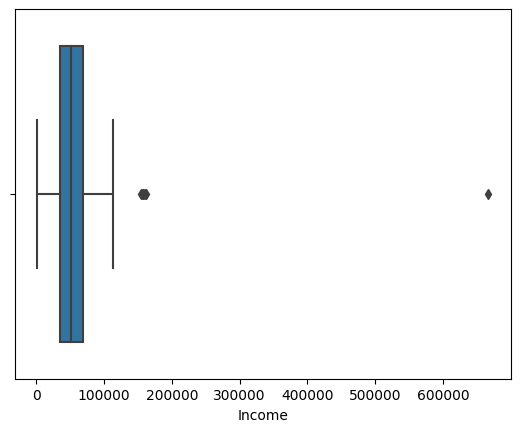

In [9]:
sns.boxplot(data=df, x= 'Income')

Dapat terlihat bahwa distribusi data kolom `Income` tidak normal (*right skew*) maka *missing value* diisi oleh median. selanjutnya kita cari dulu nilai mediannya.

In [10]:
med_income = df['Income'].median()
med_income

51381.5

Setelah mengetahui nilai median yang akan diisi kedalam *missing value*, mari lihat data *missing value*.

In [11]:
# Mengisi missing value kolom Income dengan median
df['Income'] = df['Income'].fillna(med_income)

In [12]:
# Mengecek missing value setelah diisi median
df[df['Income'].isna()].reset_index()

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


Sekarang seluruh *Missing value* pada kolom `Income` sudah terisi dengan median. Selanjutnya masih terdapat kesalahan pada kolom `income`, ada nilai yang nampaknya 

Selanjutnya masih ada 1 data yang kemungkinan ada 1 kesalahan input nilai 666.666. karena dinilai kurang relevan maka kita akan menghapus data tersebut.

In [13]:
# Mencari Data Anomali
df[df['Income'] > 600000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,2/6/2013,23,9,...,6,0,0,0,0,0,0,3,11,0


In [14]:
df = df.drop(2233)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/8/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/1/2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13/6/2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/1/2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24/1/2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [15]:
# Mengecek data yang sudah di hapus
df[df['Income'] > 600000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


## **3. Preparation Data**

### `Education`

Selanjutnya kita akan melihat kolom `Education`. Kolom ini berisi keterangan Latar belakang pendidikan setiap pengunjung yang datang. Kolom ini memiliki 5 Variabel diantaranya "Graduation", "Phd", "Master", "2n Cycle", "Basic". Terlihat ada beberapa variabel yang menggunakan istilah yang kurang tepat dan ada beberapa yang memiliki persamaan makna.

In [16]:
df[['Education']].value_counts()

Education 
Graduation    1126
PhD           486 
Master        370 
2n Cycle      203 
Basic         54  
Name: count, dtype: int64

Dapat dilihat pada kolom `Education` terdapat variabel yang memiliki kesamaan makna, untuk memudahkan analisis maka variabel digabungkan dan penamaan yang kurang mewakili di ganti dengan kata yang lebih sesuai. 

In [17]:
df['Education'] = df['Education'].replace('2n Cycle', 'Master')
df['Education'] = df['Education'].replace('Basic', 'Primary School')
df['Education'] = df['Education'].replace('PhD', 'Post Graduate')
df['Education'] = df['Education'].replace('Graduation', 'Graduate')
df[['Education']].value_counts()

Education     
Graduate          1126
Master            573 
Post Graduate     486 
Primary School    54  
Name: count, dtype: int64

Setelah koreksi di atas, terdapat beberapa perubahan pada kolom `Education`, yaitu :
- `2n cycle` digabungkan dengan `Master`
- `Basic` diubah menjadi `Primary School`
- `PhD` diubah menjadi `Post Graduate`
- `Graduation` di ubah menjadi `Graduate`

### `Marital_Status`

Selanjutnya kita akan mengecek kolom `Marital_Status`. Kolom ini berisi Status perkawinan Pengunjung, apakah pengunjung yang datang sudah menikah, bercerai atau belum menikah. Kolom ini memiliki 8 variabel. untuk memudahkan analisis, maka variabel akan di gabungkan sesuai dengan variabel yang mendekati.

In [18]:
# Mengecek Variabel didalam kolom Martial_Status
df[['Marital_Status']].value_counts()

Marital_Status
Married           864
Together          579
Single            480
Divorced          232
Widow             77 
Alone             3  
Absurd            2  
YOLO              2  
Name: count, dtype: int64

kita akan merubah dulu penamaan `Marital_Status` menjadi `Marital_Status`.

In [19]:
df = df.rename(columns={'Marital_Status':'MaritalStatus'})
df

,ID,Year_Birth,Education,MaritalStatus,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduate,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduate,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduate,Together,71613.0,0,0,21/8/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduate,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Post Graduate,Married,58293.0,1,0,19/1/2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,13/6/2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,Post Graduate,Together,64014.0,2,1,10/6/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduate,Divorced,56981.0,0,0,25/1/2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24/1/2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Bisa dilihat bahwa terdapat variabel yang memiliki persamaan makna bahasa, maka untuk setiap variabel yang memiliki persamaan makna akan digabung agar memudahkan analisis.

In [20]:
#menggabungakan Variabel pada kolom Marital_Status
df['MaritalStatus'] = df['MaritalStatus'].replace('Together', 'Married')
df['MaritalStatus'] = df['MaritalStatus'].replace('Widow', 'Divorced')
df['MaritalStatus'] = df['MaritalStatus'].replace(['Alone','Absurd','YOLO'], 'Single')
df[['MaritalStatus']].value_counts()

MaritalStatus
Married          1443
Single           487 
Divorced         309 
Name: count, dtype: int64

Setelah digabungkan, sekarang kita memiliki 3 variabel yang mewakili nilai yang kita inginkan dari kolom `MaritalStatus`, Yaitu:

- `Together` digabung dengan `Married`
- `Widow` digabung dengan `Divorced`
- `Alone, Absurd, YOLO` digabung dengan `Single`

### `Dt_Customer`

Selanjutnya kita akan mengecek kolom `Dt_Customer`. Kolom ini berisi tanggal kunjungan setiap pengunjung yang datang. 

In [21]:
df[['Dt_Customer']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 0 to 2239
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Dt_Customer  2239 non-null   object
dtypes: object(1)
memory usage: 35.0+ KB


Dapat dilihat bahwa tipe data pada kolom `Dt_Customer` masih berupa 'object'. Maka kita akan mengubahnya menjadi tipe data datetime.

In [22]:
# Mengubah tipe data pada kolom Dt_Customer
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2239, dtype: datetime64[ns]

selanjutnya, nama kolom `Dt_Customer` diubah menjadi `DtCustomer`

In [23]:
df = df.rename(columns={'Dt_Customer':'DtCustomer'})
df

,ID,Year_Birth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduate,Married,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduate,Married,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Post Graduate,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,Post Graduate,Married,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


Selanjutnya, masih terdapat kolom yang harus dihapus yaitu kolom `Z_Revenue` dan `Z_CostContact` karena didalam hanya memiliki 1 nilai unik. Maka saya memutuskan untuk menghapus.

In [24]:
# Menghapus kolom Z_CostContact
df = df.drop(columns='Z_CostContact')
df

,ID,Year_Birth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_Revenue,Response
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,11,1
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,11,0
2,4141,1965,Graduate,Married,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,11,0
3,6182,1984,Graduate,Married,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,11,0
4,5324,1981,Post Graduate,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,2013-06-13,46,709,...,4,5,0,0,0,0,0,0,11,0
2236,4001,1946,Post Graduate,Married,64014.0,2,1,2014-06-10,56,406,...,5,7,0,0,0,1,0,0,11,0
2237,7270,1981,Graduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,13,6,0,1,0,0,0,0,11,0
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,...,10,3,0,0,0,0,0,0,11,0


In [25]:
# Menghapus kolom Z_Revenue
df = df.drop(columns='Z_Revenue')
df

,ID,Year_Birth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduate,Married,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduate,Married,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,Post Graduate,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,Post Graduate,Married,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


Selanjutnya, kita akan menambahkan kolom `Age` yang datanya diambil dari kolom `YearBirth` agar memudahkan dalam analisis.

In [26]:
# Melihat rentan tanggal pada kolom Dt_customer
earliest_date = df['DtCustomer'].min() 
latest_date = df['DtCustomer'].max()  
print("Earliest Date:", earliest_date) 
print("Latest Date:", latest_date)

Earliest Date: 2012-07-30 00:00:00
Latest Date: 2014-06-29 00:00:00


Dapat dilihat bahwa rentan tanggal pada kolom `Dt_Customer` dari tahun 2012 hingga 2014 (2 tahun) sehingga untuk relevansi variabel pada kolom `age` akan menggunakan tahun 2014 sebagai dasara perhitungandan kolom `Year_Birth` diubah menjadi `YearBirth`.

In [27]:
df = df.rename(columns={'Year_Birth': 'YearBirth'})
df

,ID,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduate,Married,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduate,Married,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,Post Graduate,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,Post Graduate,Married,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


In [28]:
# Membuat kolom baru umur berdasarkan kolom Year_Birth
df['Age'] = 2014 - df['YearBirth']
df[['Age']]

,Age
0,57
1,60
2,49
3,30
4,33
...,...
2235,47
2236,68
2237,33
2238,58


Setelah memiliki kolom `Age`, mari kita lihat distribusi datanya.

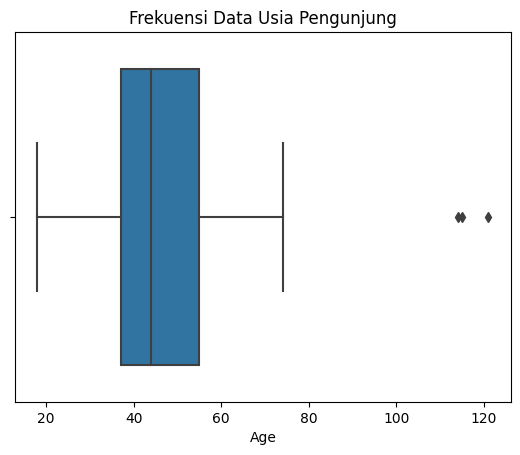

In [29]:
sns.boxplot(data=df, x='Age')
plt.title('Frekuensi Data Usia Pengunjung')
plt.show()

Dari data diatas, terlihat distribusi data tidak normal karena terdapat data outlier mengarah ke kanan *(Right Skew)*. Dengan nilai diatas 120 tahun. untuk lebih lanjut mari kita lihat jumlah data outlier apakah relevan atau tidak, dan persentase data outliernya.

In [30]:
df[df['Age'] >= 100]

,ID,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
192,7829,1900,Master,Divorced,36640.0,1,0,2013-09-26,99,15,...,2,5,0,0,0,0,0,1,0,114
239,11004,1893,Master,Single,60182.0,0,1,2014-05-17,23,8,...,2,4,0,0,0,0,0,0,0,121
339,1150,1899,Post Graduate,Married,83532.0,0,0,2013-09-26,36,755,...,4,1,0,0,1,0,0,0,0,115


Dapat dilihat bahwa terdapat data outlier pada kolom `Age` yang datanya tidak normal yaitu usia 124, 123, 130 tahun yang dirasa kurang relevan. maka keputusan yang diambil adalah dengan menghapus agar tidak menggangu distribusi data pada kolom lain. karena dilihat pada kolom `MntWines` hingga 775. 

In [31]:
# Menghapus baris dengan `Age` diatas 100

df = df[df['Age'] <= 100]
df

,ID,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,57
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,60
2,4141,1965,Graduate,Married,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,49
3,6182,1984,Graduate,Married,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,30
4,5324,1981,Post Graduate,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,2013-06-13,46,709,...,4,5,0,0,0,0,0,0,0,47
2236,4001,1946,Post Graduate,Married,64014.0,2,1,2014-06-10,56,406,...,5,7,0,0,0,1,0,0,0,68
2237,7270,1981,Graduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,13,6,0,1,0,0,0,0,0,33
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,...,10,3,0,0,0,0,0,0,0,58


In [32]:
# Mengecek Outlier yang sudah terhapus
df[df['Age'] >= 100]

,ID,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age


Setelah nilai outlier di hapus, selanjutnya untuk memudahkan interpretasi. maka kolom `Age` akan dikelompokan menjadi 3 kelompok menjadi :
- Muda (18-35)
- Dewasa (36-50)
- Lansia (51-74)

In [33]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 35, 50, 75], labels=['Muda (18-35)', 'Dewasa (36-50)', 'Lansia (51-75)'], include_lowest=True, right=False) 
df[['AgeGroup']].value_counts()

AgeGroup      
Dewasa (36-50)    1029
Lansia (51-75)    783 
Muda (18-35)      424 
Name: count, dtype: int64

Selanjutnya kita akan mengubah nama pada setiap kolom agar lebih relevan. Adapun kolom yang akan di ubah adalah :
- `MntWiness` menjadi `Wines`
- `MntFruits` menjadi `Fruits`
- `MntMeatProducts` menjadi `Meats`
- `MntGoldProds` menjadi `Golds`
- `MntFishProducts` menjadi `Fishes`
- `MntSweetProducts` menjadi `Sweetes`
- `NumDealsPurchases` menjadi `Deals`
- `NumWebPurchases` menjadi `WebPurchases`
- `NumCatalogPurchases` menjadi `CatalogPurchases`
- `NumStorePurchases` menjadi `StorePurchases`
- `NumWebVisitMonth` menjadi `WebVisit`
- `AcceptedCmp1` menjadi  `AcptCmp1`
- `AcceptedCmp2` menjadi  `AcptCmp2`
- `AcceptedCmp3` menjadi  `AcptCmp3`
- `AcceptedCmp4` menjadi  `AcptCmp4`
- `AcceptedCmp5` menjadi  `AcptCmp5`


In [34]:
df = df.rename(columns={
'MntWines' : 'Wines',
'MntFruits' : 'Fruits',
'MntMeatProducts' : 'Meats',
'MntGoldProds' : 'Golds',
'MntFishProducts' : 'Fishes',
'MntSweetProducts' : 'Sweetes',
'NumDealsPurchases' : 'Deals',
'NumWebPurchases' : 'WebPurchases',
'NumCatalogPurchases' : 'CatalogPurchases',
'NumStorePurchases' : 'StorePurchases',
'NumWebVisitMonth' : 'WebVisit',
'AcceptedCmp1' :  'AcptCmp1',
'AcceptedCmp2' :  'AcptCmp2',
'AcceptedCmp3' :  'AcptCmp3',
'AcceptedCmp4' :  'AcptCmp4',
'AcceptedCmp5' :  'AcptCmp5',
})
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,2229,2230,2231,2232,2234,2235,2236,2237,2238,2239
ID,5524,2174,4141,6182,5324,7446,965,6177,4855,5899,...,10084,7004,9817,8080,8372,10870,4001,7270,8235,9405
YearBirth,1957,1954,1965,1984,1981,1967,1971,1985,1974,1950,...,1972,1984,1970,1986,1974,1967,1946,1981,1956,1954
Education,Graduate,Graduate,Graduate,Graduate,Post Graduate,Master,Graduate,Post Graduate,Post Graduate,Post Graduate,...,Graduate,Graduate,Master,Graduate,Graduate,Graduate,Post Graduate,Graduate,Master,Post Graduate
MaritalStatus,Single,Single,Married,Married,Married,Married,Divorced,Married,Married,Married,...,Married,Single,Single,Single,Married,Married,Married,Divorced,Married,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0,62513.0,55635.0,33454.0,30351.0,5648.0,...,24434.0,11012.0,44802.0,26816.0,34421.0,61223.0,64014.0,56981.0,69245.0,52869.0
Kidhome,0,1,0,1,1,0,0,1,1,1,...,2,1,0,0,1,0,2,0,0,1
Teenhome,0,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
DtCustomer,2012-09-04 00:00:00,2014-03-08 00:00:00,2013-08-21 00:00:00,2014-02-10 00:00:00,2014-01-19 00:00:00,2013-09-09 00:00:00,2012-11-13 00:00:00,2013-05-08 00:00:00,2013-06-06 00:00:00,2014-03-13 00:00:00,...,2014-05-18 00:00:00,2013-03-16 00:00:00,2012-08-21 00:00:00,2012-08-17 00:00:00,2013-07-01 00:00:00,2013-06-13 00:00:00,2014-06-10 00:00:00,2014-01-25 00:00:00,2014-01-24 00:00:00,2012-10-15 00:00:00
Recency,58,38,26,26,94,16,34,32,19,68,...,9,82,71,50,81,46,56,91,8,40
Wines,635,11,426,11,173,520,235,76,14,28,...,3,24,853,5,3,709,406,908,428,84


Selanjutnya untuk kita akan membuat kolom baru "TotalPurchase" dan "TotalSpent" untuk mengetahui semua pembelian customer dari metode belanja yang berbeda dan jumlah dari semua produk yang dibeli customer di supermarket.

In [35]:
# Membuat kolom TotalPurchase dan TotalSpent
df['TotalPurchase'] = df['WebPurchases'] + df['CatalogPurchases'] + df['StorePurchases']
df['TotalSpent'] = df['Wines'] + df['Fruits'] + df[ 'Meats'] + df['Fishes'] + df['Sweetes'] + df['Golds']

selanjutnya membuat kolom `TotalAcptCmp` untuk mengetahui semua campaign yang pernah digunakan oleh customer.

In [36]:
df['TotalAcptCmp'] = df['AcptCmp1'] + df['AcptCmp2'] + df['AcptCmp3'] + df['AcptCmp3'] + df['AcptCmp4'] + df['AcptCmp5'] 

In [37]:
df['TotalAcptCmp'].value_counts()

TotalAcptCmp
0    1774
2    196 
1    195 
3    45  
4    23  
5    3   
Name: count, dtype: int64

Selanjutnya kita akan membuat kolom `IncomeGroup` untuk mengkelompokan pendapatan customer.

In [38]:
# Define the income bins and labels
income_bins = [0, 30000, 60000, 90000, float('inf')]  # Custom bin edges
income_labels = ['Low', 'Mid', 'High', 'Very High']

# Add a new column for income categories
df['IncomeCategory'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)

df['IncomeCategory'].value_counts()

IncomeCategory
Mid          1027
High         786 
Low          370 
Very High    53  
Name: count, dtype: int64

Selanjutnya, kolom 'ID' dihapus karena dirasa tidak akan digunakan dalam proses analisis data.

In [39]:
df = df.drop(labels = 'ID', axis = 1)
df

,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,Wines,Fruits,...,AcptCmp1,AcptCmp2,Complain,Response,Age,AgeGroup,TotalPurchase,TotalSpent,TotalAcptCmp,IncomeCategory
0,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,1,57,Lansia (51-75),22,1617,0,Mid
1,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,60,Lansia (51-75),4,27,0,Mid
2,1965,Graduate,Married,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,49,Dewasa (36-50),20,776,0,High
3,1984,Graduate,Married,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,30,Muda (18-35),6,53,0,Low
4,1981,Post Graduate,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,33,Muda (18-35),14,422,0,Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduate,Married,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,47,Dewasa (36-50),16,1341,0,High
2236,1946,Post Graduate,Married,64014.0,2,1,2014-06-10,56,406,0,...,1,0,0,0,68,Lansia (51-75),15,444,1,High
2237,1981,Graduate,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,0,33,Muda (18-35),18,1241,1,Mid
2238,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,58,Lansia (51-75),21,843,0,High


In [40]:
df.to_csv('Finalpisan.csv')

## **4. Data Analisis**

Kita sudah selesai membersihkan data, sekarang mari kita melihat informasi dari data yang sudah kita bersihkan.

In [41]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(2236, 32)


,dataFeatures,dataType,null,unique,uniqueSample
0,YearBirth,int64,0,56,"[1940, 1971]"
1,Education,object,0,4,"[Graduate, Master]"
2,MaritalStatus,object,0,3,"[Single, Married]"
3,Income,float64,0,1971,"[45759.0, 50616.0]"
4,Kidhome,int64,0,3,"[0, 2]"
5,Teenhome,int64,0,3,"[0, 2]"
6,DtCustomer,datetime64[ns],0,663,"[2014-05-10T00:00:00.000000000, 2014-04-10T00:00:00.000000000]"
7,Recency,int64,0,100,"[95, 49]"
8,Wines,int64,0,775,"[451, 801]"
9,Fruits,int64,0,158,"[194, 81]"


In [42]:
df.shape

(2236, 32)

Sebelum dibersihkan, kita memiliki 2240 baris data dan 29 kolom data, sekarang kita memiliki 2236 baris dan 32 kolom. 
- Ada 1 data yang dihapus karena memiliki income yang tidak normal, Sekitar 24 data kosong pada kolom `Income` diisi dengan median. 
- Pada kolom `Education` dan `Martial_Status` Variabel yang memiliki persamaan arti digabung dan penamaan diubah dengan istilah yang dirasa relevan. 
- Tipe data pada kolom `Dt_Customer` diubah menjadi datetime 
- Tipe data pada kolom `Income` berupa float diubah menjadi integer 
- Kolom `Z_Costcontact` dan `Z_Revenue` dihapus karena memiliki 1 nilai sehingga tidak bisa di interpretasikan.
- Membuat Kolom baru `Age` yang diambil dari kolom `Year_Birth` agar memudahkan analisis, dan menghapus outlier karena dinilai kurang relevan
- Membuat kolom baru `TotalPurchase` untuk jumlah dari semua produk yang dibeli oleh pelanggan di Supermarket.
- Membuat kolom baru `TotalSpent` untuk mengetahui jumlah pembelian semua produk customer
- Membuat kolom baru `TotalAcptCmp` untuk mengetahui jumlah campaign yang digunakan customer
- Membuat kolom baru `IncomeCategory` untuk mengkelompokan pendapatan customer

In [43]:
df.describe()

,YearBirth,Income,Kidhome,Teenhome,DtCustomer,Recency,Wines,Fruits,Meats,Fishes,...,AcptCmp4,AcptCmp5,AcptCmp1,AcptCmp2,Complain,Response,Age,TotalPurchase,TotalSpent,TotalAcptCmp
count,2236.000000,2236.000000,2236.000000,2236.000000,2236,2236.000000,2236.00000,2236.000000,2236.000000,2236.000000,...,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,1968.898032,51952.614043,0.444097,0.506708,2013-07-10 05:26:30.697674240,49.116279,304.12746,26.275939,166.983453,37.536225,...,0.074687,0.072451,0.064401,0.013417,0.008945,0.149374,45.101968,12.546512,605.986583,0.370751
min,1940.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,5.000000,0.000000
25%,1959.000000,35502.500000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.00000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,6.000000,69.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 00:00:00,49.000000,174.00000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,12.000000,396.500000,0.000000
75%,1977.000000,68275.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.25000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,18.000000,1045.500000,0.000000
max,1996.000000,162397.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.00000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,74.000000,32.000000,2525.000000,5.000000
std,11.703281,21411.466851,0.538459,0.544609,NaN,28.957284,336.59181,39.724007,225.689645,54.648562,...,0.262944,0.259291,0.245520,0.115077,0.094173,0.356536,11.703281,7.206577,601.865156,0.824580



Dari statistik deskriptif untuk variabel-variabel tertentu dalam dataset, kita dapat mendapatkan pemahaman yang lebih spesifik tentang karakteristiknya:

Tahun lahir Customer:

- Rata-rata tahun kelahiran pelanggan adalah sekitar 1969.
- Pelanggan termuda lahir pada tahun 1996, sementara yang tertua lahir pada tahun 1940.

Pendapatan Customer:

- Rata-rata pendapatan pelanggan adalah sekitar 51,952.
- Pendapatan tertinggi mencapai 162,397, sementara pendapatan terendah hanya 1,730.
- Sebagian besar pelanggan memiliki pendapatan di kisaran menengah (50% pada kisaran 35,502 hingga 68,275).

Transaksi terakhir:

- Rata-rata pelanggan telah melakukan transaksi sekitar 49 hari yang lalu.
- Pelanggan terakhir melakukan transaksi pada hari ke-99.

Usia Customer :

- Rata-rata usia pelanggan adalah sekitar 45 tahun.
- Pelanggan termuda berusia 18 tahun, sementara pelanggan tertua berusia 74 tahun.

Total Pembelian:

- Rata-rata total pembelian pelanggan adalah sekitar 605.99.
- Sebagian besar pelanggan (50%) memiliki total pembelian sekitar 396.50.

Total Pengeluaran:

- Rata-rata total pengeluaran pelanggan adalah sekitar 12.55.
- Sebagian besar pelanggan (50%) memiliki total pengeluaran sekitar 12.

Total kampanye yang diterima:

- Rata-rata jumlah kampanye yang diterima oleh pelanggan adalah sekitar 0.37.
- Sebagian besar pelanggan (50%) tidak menerima kampanye apa pun.


Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu :

1. Bagaimana demografi pengunjung yang berbelanja selama 2 tahun terakhir?
2. Bagaimana penjualan setiap produk berdasarkan karakteristik pengunjung?
3. Bagaimana pengaruh promosi terhadap penjualan?
4. Channel penjualan mana yang paling banyak terjadinya penjualan?

Analisis akan dilakukan dengan membandingkan data customer dan penjualan untuk meningkatkan penjualan pada channel penjualan berdasarkan fitur yang tersedia. 

## **`1.Segmentasi Pengunjung yang Berbelanja Selama 2 Tahun Terakhir`**

Pertama kita lihat dulu distribusi data untuk setiap variabel yang digunakan

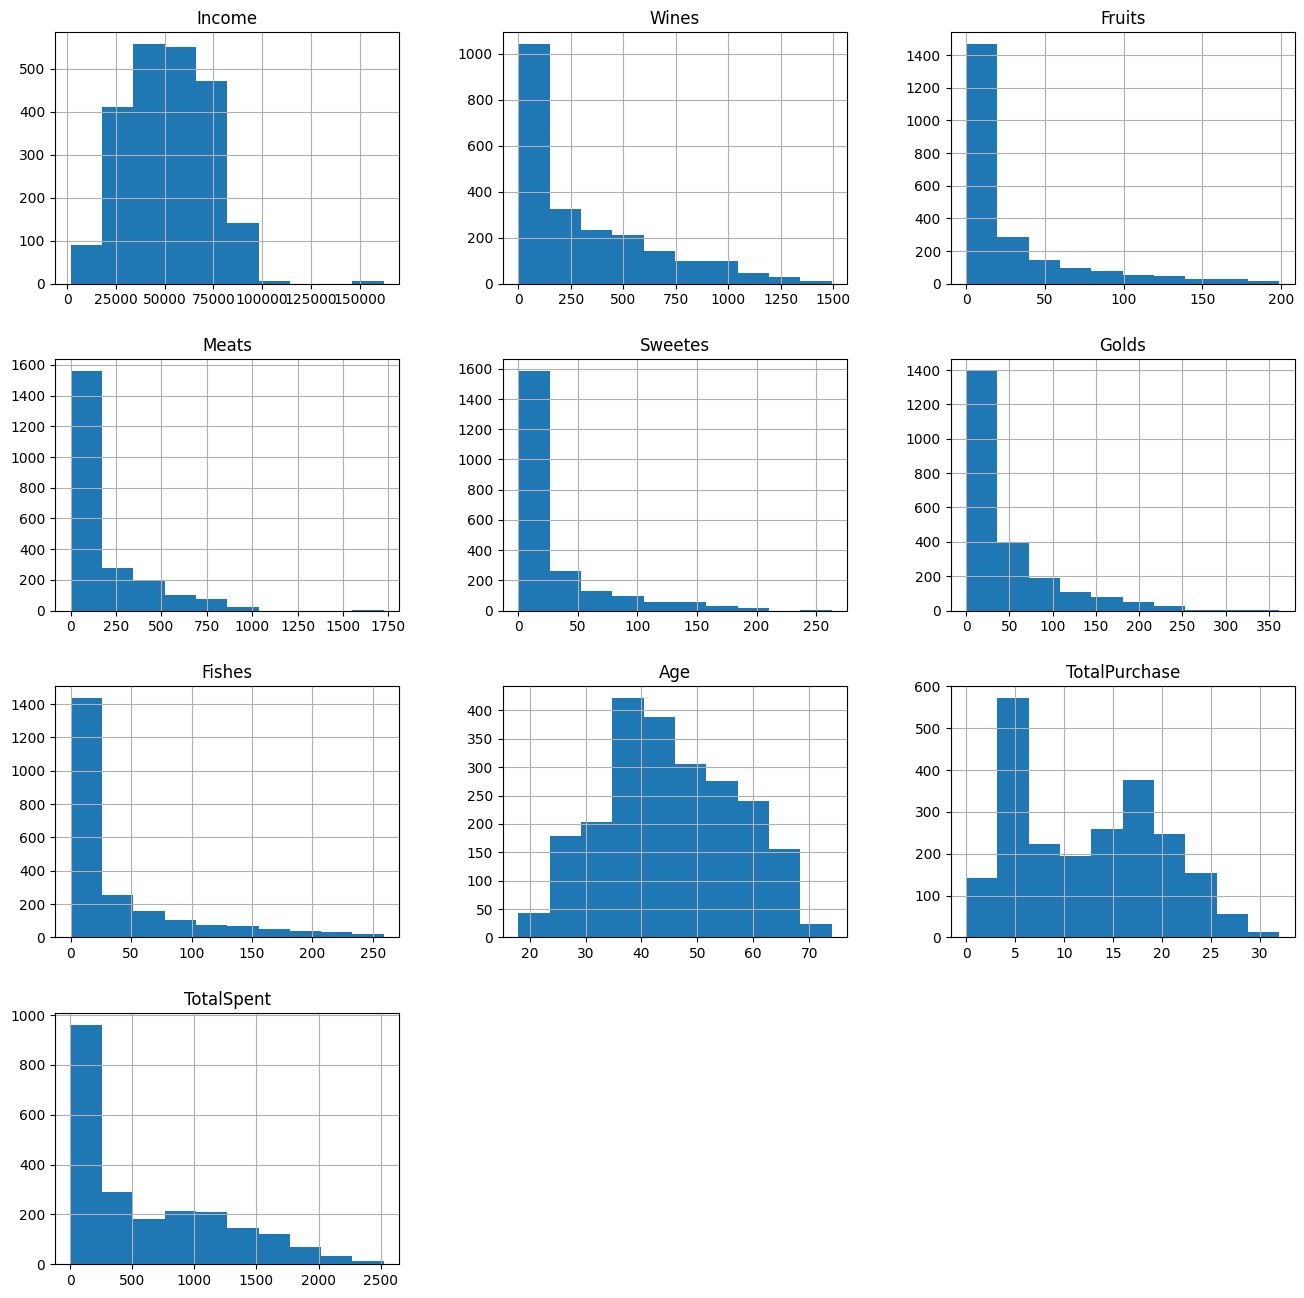

In [44]:
# Menngecek Distribusi data
df[['Income', 'Wines', 'Fruits', 'Meats','Sweetes', 'Golds', 'Fishes', 'Age','TotalPurchase', 'TotalSpent',]].hist(figsize=(16,16))
plt.show()

Dari histogram diatas terlihat semua distribusi data yang akan digunakan tidak terdistribusi normal. untuk lebih jelasnya kita lakukan uji normalitas setiap kolomnya.

In [45]:
# Uji normalitas setiap kolom kategori produk dengan normaltest 
list_produk = ['Income', 'Wines', 'Fruits', 'Meats','Sweetes', 'Golds', 'Fishes', 'Age','TotalPurchase', 'TotalSpent',]
for i in list_produk:
    stat, pvalue = normaltest(df[i])
    if pvalue > 0.05 :
        print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data pada kolom {i} terdistribusi normal')
    else :
        print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data pada kolom {i} TIDAK terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan data pada kolom Income TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom Wines TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom Fruits TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom Meats TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom Sweetes TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom Golds TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom Fishes TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom Age TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom TotalPurchase TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom TotalSpent TIDAK terdistribusi normal


Setelah mengetahui bahwa semua data TIDAK terdistribusi normal, maka kedepannya untuk setiap data menggunakan median. Selanjutnya kita akan mencari tau demografi customer yang berbelanja selama 2 tahun terakhir.

**Demografi Customer Berdasarkan Usia**

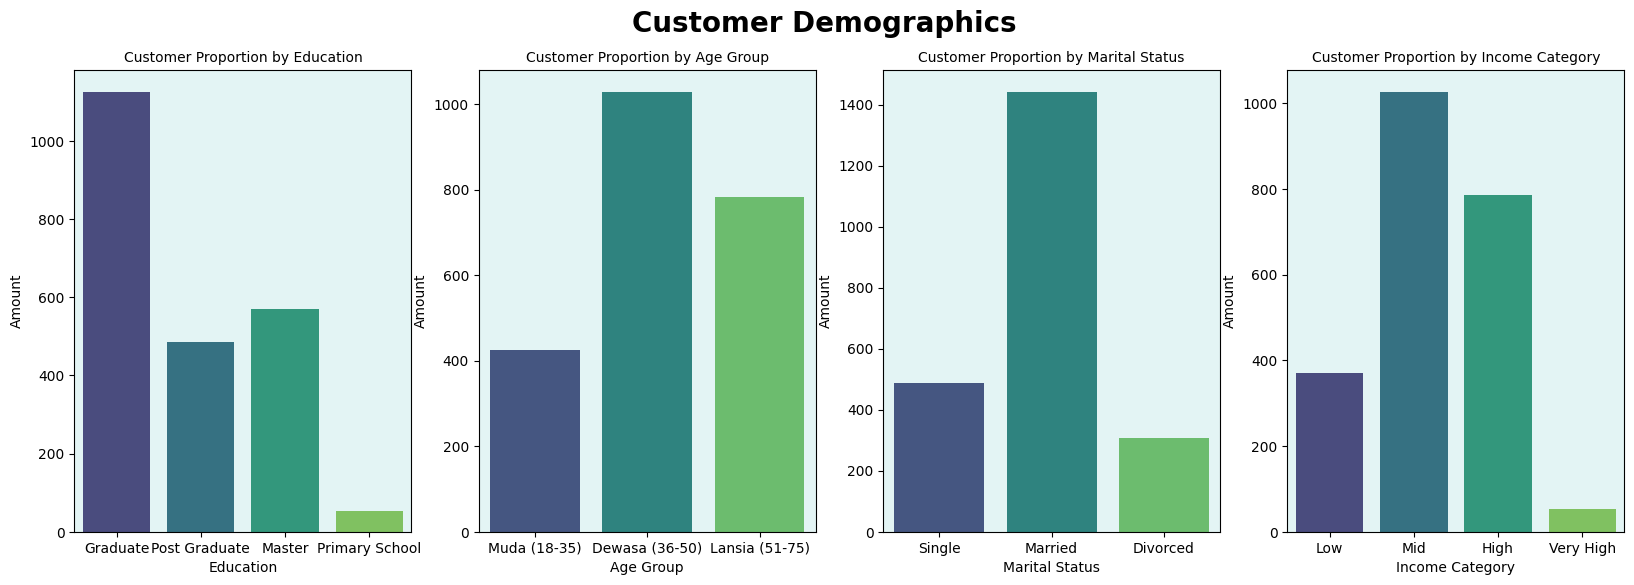

In [46]:
# Segmentasi Customer Berdasarkan Usia
fig, axes = plt.subplots(1, 4, figsize=(20,6))
plt.suptitle('Customer Demographics', size= 20, fontweight='bold')

sns.countplot(data=df, x='Education', ax=axes[0], palette='viridis')
axes[0].set_title('Customer Proportion by Education', size = 10, )
axes[0].set_ylabel('Amount')
axes[0].set_xlabel('Education')
axes[0].set_facecolor('#E3F4F4')

sns.countplot(data=df, x='AgeGroup',ax=axes[1], palette='viridis')
axes[1].set_title('Customer Proportion by Age Group', size = 10)
axes[1].set_ylabel('Amount')
axes[1].set_xlabel('Age Group')
axes[1].set_facecolor('#E3F4F4')

sns.countplot(data=df, x='MaritalStatus', ax=axes[2], palette='viridis')
axes[2].set_title('Customer Proportion by Marital Status', size = 10)
axes[2].set_ylabel('Amount')
axes[2].set_xlabel('Marital Status')
axes[2].set_facecolor('#E3F4F4')

sns.countplot(data=df, x='IncomeCategory', ax=axes[3], palette='viridis')
axes[3].set_title('Customer Proportion by Income Category', size = 10)
axes[3].set_ylabel('Amount')
axes[3].set_xlabel('Income Category')
axes[3].set_facecolor('#E3F4F4')
plt.show()



Dari visualisasi diatas kita mendapatkan informasi :

1. Edukasi

- Sebagian besar customer berlatar pendidikan Graduate, Master dan Post Graduate
- Ini sangat normal melihat sebagian besar customer sudah memiliki pendapatan

2. Grup Usia

- Sebagian besar customer berada di kelompok usia Dewasa dan Lansia
- Hal ini akan diselidiki lebih lanjut

3. Status Pernikahan

- Customer paling banyak adalah customer yang sudah menikah (married), perbedaan sangat signifikan dibandingkan dengan customer yang single dan divorced

4. Income Category 
- Sebagian besar berpenghasilan mid dan tinggi
- Ini membuktikan bahwa kemampuan customer untuk berbelanja cukup besar.

Selanjutnya mari kita lihat total penjualan setiap produk selama 2 tahun terakhir.

## **`2.Penjualan Produk Berdasarkan Karakteristik Pengunjung`**

In [47]:
dfProduct= df[['Wines','Fruits', 'Meats', 'Fishes', 'Sweetes', 'Golds']].sum()

# Membuat DataFrame baru
dfProductSummary = pd.DataFrame({'Produk': dfProduct.index, 'TotalPenjualan': dfProduct.values}).sort_values('TotalPenjualan', ascending=False)
dfProductSummary

,Produk,TotalPenjualan
0,Wines,680029
2,Meats,373375
5,Golds,98346
3,Fishes,83931
4,Sweetes,60552
1,Fruits,58753


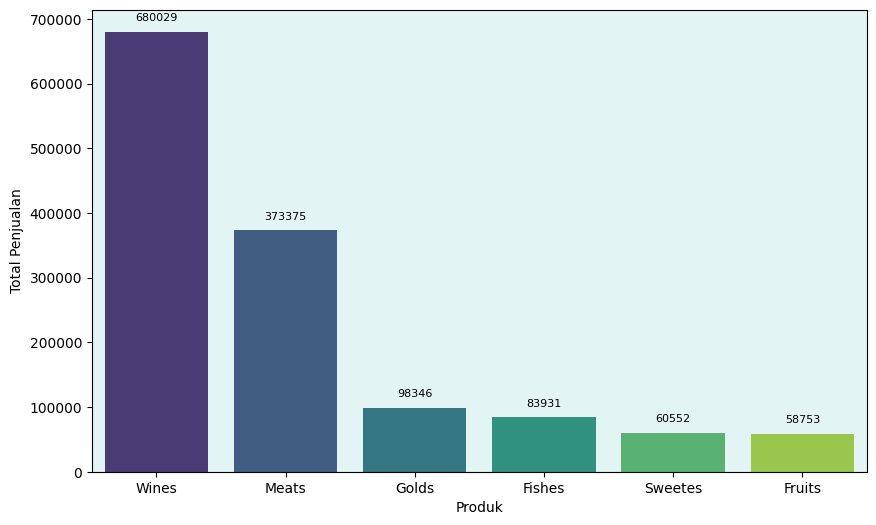

In [48]:
# Visualisasi penjualan produk selama 2 tahun

plt.figure(figsize=(10,6))
ax = sns.barplot(data=dfProductSummary, x='Produk', y= 'TotalPenjualan', palette='viridis')
plt.xlabel('Produk')
plt.ylabel('Total Penjualan')

# Menambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

ax.set_facecolor('#E3F4F4')
plt.show()

Dari grafik diatas, kita bisa mengambil kesimpulan bahwa :
- Penjualan tertinggi ada pada produk wine dengan total 680029
- Penjualan produk terendah ada pada produk Fruits dengan total 58753

Selanjutnya mari kita lihat penjualan berdasarkan karakterisik customer.

 ### **Penjualan Berdasarkan Pendidikan Customer**

In [49]:
# membuat variable baru yang berisi data pembelian setiap produk berdasarkan tingkat pendidikan
dfspent_education = df.groupby('Education')[['TotalSpent']].sum().reset_index()
dfspent_education.sort_values('TotalSpent', ascending=False)

,Education,TotalSpent
0,Graduate,698564
1,Master,327067
2,Post Graduate,324938
3,Primary School,4417


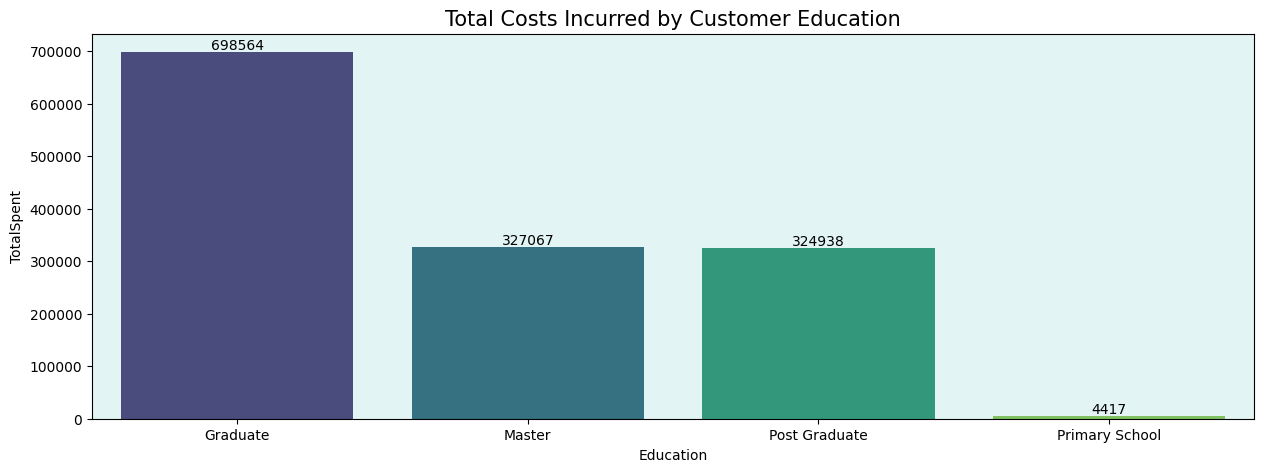

In [94]:
# visualisasi penjualan berdasarkan tingkat pendidikan customer

plt.figure(figsize=(15,5))
plt.title('Total Costs Incurred by Customer Education', size=15)
ax = sns.barplot(dfspent_education, x='Education', y='TotalSpent', order=dfspent_education.sort_values('TotalSpent', ascending=False).Education,palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)
    ax.set_facecolor('#E3F4F4')

Dari grafik diatas dapat diambil kesimpulan :

- Customer dengan pendidikan Post Graduate merupakan customer yang paling besar berbelanja sebesar 493 dibandingkan customer dengan pendidikan yang berbeda
- Customer dengan pendidikan Primary School adalah customer dengan angka belanja paling sedikit dengan median 57.

Selanjutnya mari kita lihat persebaran pengeluaran customer berdasarkan produk.

In [84]:
# Membuat Kelompok kolom baru
df_education = df.groupby('Education')[['Wines', 'Fruits', 'Meats', 'Fishes', 'Sweetes', 'Golds']].median().reset_index().round()
df_education

,Education,Wines,Fruits,Meats,Fishes,Sweetes,Golds
0,Graduate,184.0,10.0,78.0,15.0,12.0,29.0
1,Master,145.0,8.0,59.0,12.0,7.0,23.0
2,Post Graduate,269.0,4.0,69.0,6.0,3.0,16.0
3,Primary School,2.0,7.0,7.0,9.0,7.0,15.0


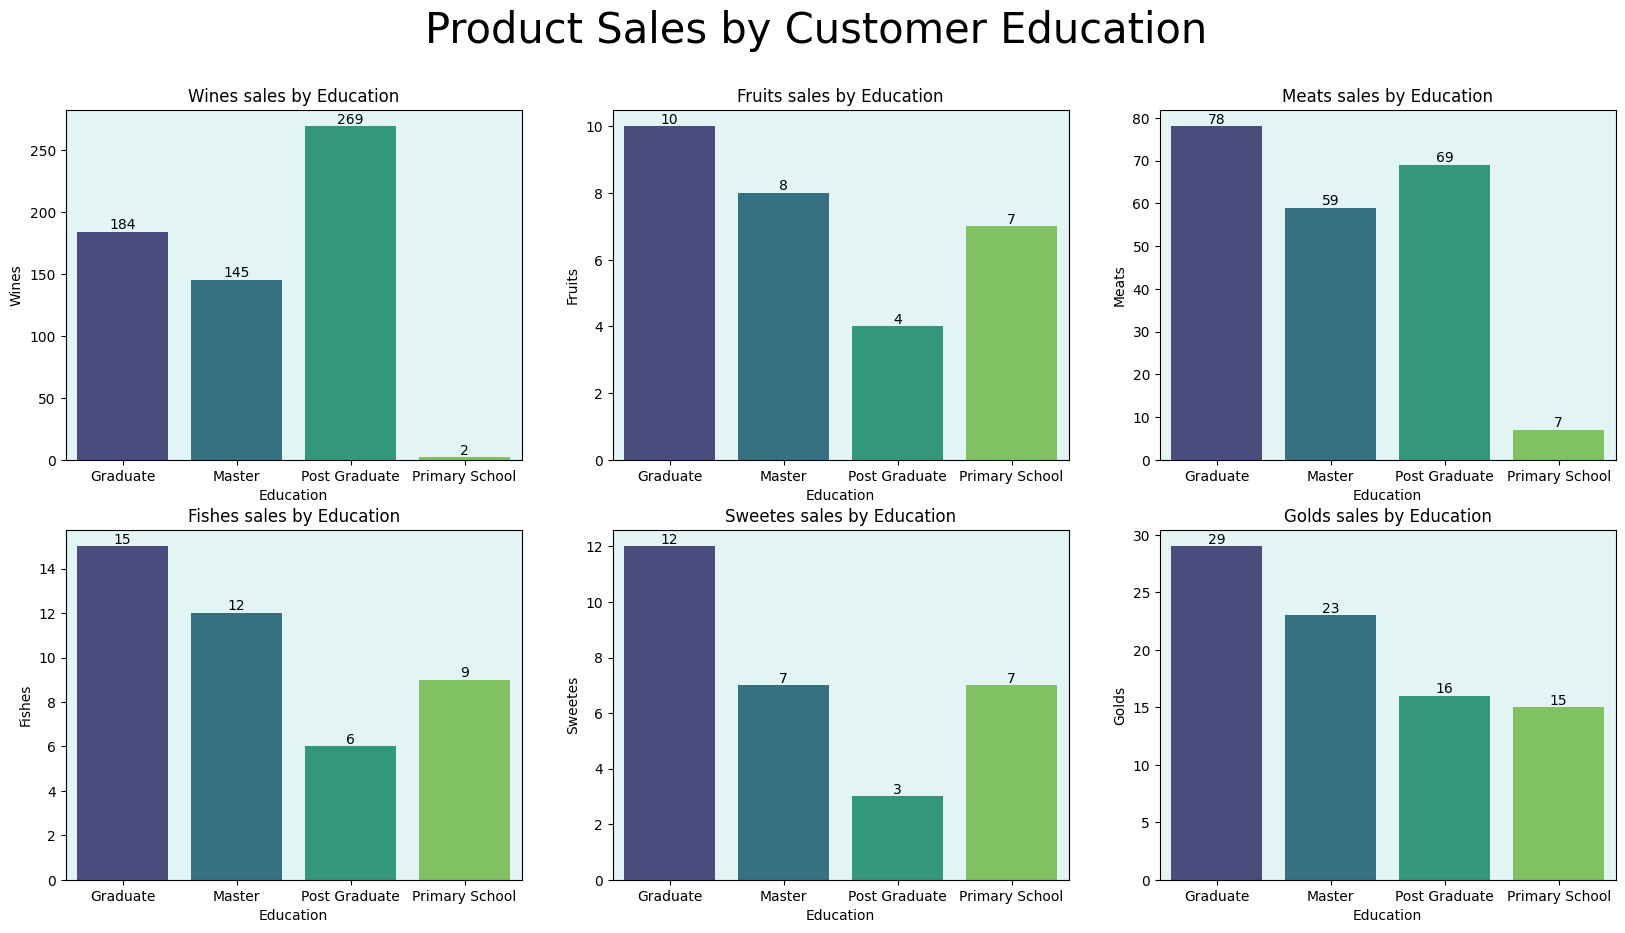

In [85]:
list_product = ['Wines', 'Fruits', 'Meats', 'Fishes', 'Sweetes', 'Golds']
id = 0
n_rows = 2
n_cols = 3
plt.figure(figsize=(20,10))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        ax = sns.barplot(data=df_education, x='Education', y = list_product[id], ci=0, estimator = 'median', palette='viridis')
        plt.title(f'{list_product[id]} sales by Education')
        id += 1
        for i in ax.containers:
            ax.bar_label(i,)
            ax.set_facecolor('#E3F4F4')

plt.suptitle("Product Sales by Customer Education",size = 30)
plt.show()

Dari grafik diatas dapat kita ambil kesimpulan :

Hampir semua panjualan produk tertinggi berada pada customer berpendidikan Graduate kecuali penjualan wines dengan customer tertinggi adalah customer dengan pendidikan Post graduade.

Penjualan Wines :
- Dilihat dari grafik, Penjualan produk wine paling banyak ada pada customer dengan pendidikan Post Greaduate dengan median 269.
- Ini bisa dibisa dijadikan dasar untuk membuat strategi marketing untuk menargetkan customer dengan pendidikan Post Graduate untuk promosi produk wine selanjutnya
- Customer dengan pendidikan promary school menjadi customer dengan nilai penjual terkecil.

Penjualan Fruits :
- Customer paling banyak membeli produk Fruits adalah customer dengan pendidikan Graduate dengan nilai median 10.
- Customer yang paling sedikit membeli produk Fruits adalah customer dengan pendidikan Post graduate dengan nilai median 4.
- Dapat disimpulkan bahwa penjualan Fruits bisa walaupun dengan penjualan terkecil bisa menargetkan customer selain Post Graduate untuk strategi promosi selanjutnya.

Penjualan Meats :
- Penjualan Meats terbanyak ada pada customer berlatar pendidikan Graduste dengan nilai median 78.
- Customer dengan pendidikan Primary School menjadi customer dengan penjualan Meats terkecil.

Penjualan Fishes :
- Customer dengan pendidikan Graduate menjadi customer terbanyak yang membeli produk fishes dengan nilai median 15.
- Customer dengan pendidikan Post Graduate adalah customer dengan pembelian terkecil untuk produk fishes

Penjualan Sweetes :
- Penjualan Sweetes terbanyak ada pada customer berlatar belakang pendidikan Graduate dengan median sebesar 12.
- Ada kesamaan antara customer bependidikan Master dan Primary school dengan pembelian sweetes di median 7.
- Customer dengan nilai pembelian terkecil adalah customer dengan pendidikan Post Graduate

Penjualan Golds :
- Produk Golds Paling banyak di beli oleh customer dengan pendidikan Graduate dengan nilai median 29.
- Customer dengan pendidikan Primary School memiliki pembelian terkecil.

Melihat bahwa ada beberpa grafing yang menunjukan perbedaan yang tidak jauh berbeda, maka akan dilakuakn uji hipotesis untuk mengetahui apakah median berbeda signifikan atau tidak.

Hipotesis :
- Ho : Median semua level pendidikan dengan penjualan produk sama
- Ha : Minimal ada satu median yang berbeda, tetapi kita tidak tau yang mana

In [53]:
# uji hipotesis menggunakan kruskal wallis
list_produk = ['Wines', 'Fruits', 'Meats', 'Fishes', 'Sweetes', 'Golds']
for i in list_produk:
    stat, pvalue = kruskal(
        df[df['Education'] == 'Primary School'][i],
        df[df['Education'] == 'Graduate'][i],
        df[df['Education'] == 'Master'][i],
        df[df['Education'] == 'Post Graduate'][i]
    )

    if pvalue > 0.05 :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal Menolak Ho.
    Median semua level pendidikan terhadap penjualan {i} TIDAK berbeda signifikan       
    ''')
    else :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua level pendidikan terhadap penjualan {i} berbeda signifikan
    ''')


    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua level pendidikan terhadap penjualan Wines berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua level pendidikan terhadap penjualan Fruits berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua level pendidikan terhadap penjualan Meats berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua level pendidikan terhadap penjualan Fishes berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua level pendidikan terhadap penjualan Sweetes berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua level pendidikan terhadap penjualan Golds berbeda signifikan
    


 ### **Penjualan Berdasarkan Status Pernikahan Customer**

In [86]:
# membuat variable baru yang berisi data pembelian setiap produk berdasarkan Status Pernikahan
dfspent_MaritalStatus = df.groupby('MaritalStatus')[['TotalSpent']].sum().reset_index()
dfspent_MaritalStatus.sort_values('TotalSpent', ascending=False)

,MaritalStatus,TotalSpent
1,Married,861403
2,Single,295093
0,Divorced,198490


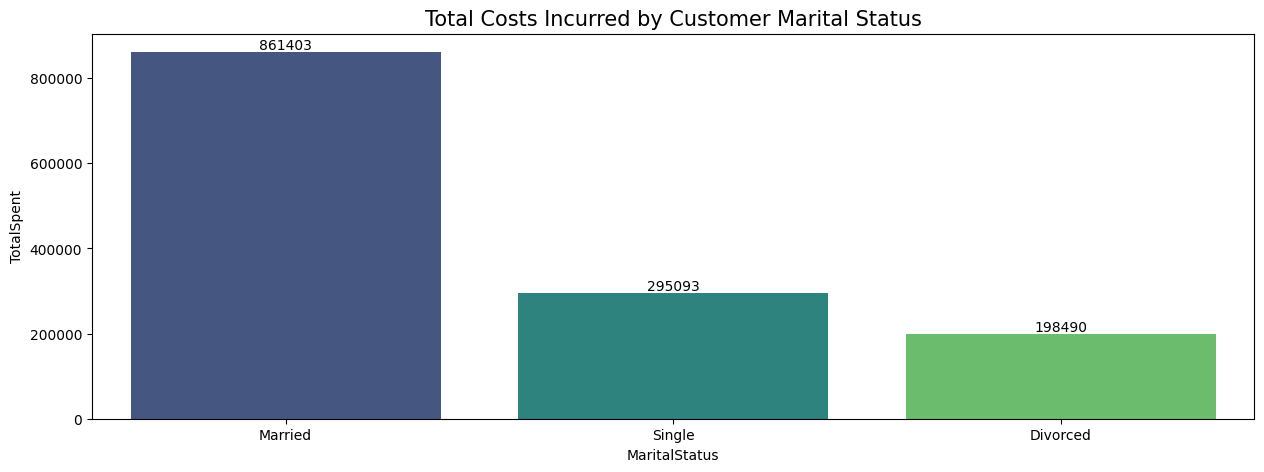

In [87]:
# visualisasi penjualan terbanyak berdasarkan status pernikahan

plt.figure(figsize=(15,5))
plt.title('Total Costs Incurred by Customer Marital Status', size=15)
ax = sns.barplot(dfspent_MaritalStatus, x='MaritalStatus', y='TotalSpent', order=dfspent_MaritalStatus.sort_values('TotalSpent', ascending=False).MaritalStatus,palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)

Dari grafik diatas dapat diambil kesimpulan :

- Customer dengan Status Divorced merupakan customer yang paling besar berbelanja sebesar 503 dibandingkan customer dengan status yang berbeda
- Customer dengan pendidikan Single adalah customer dengan angka belanja paling sedikit dengan median 369.

Selanjutnya mari kita lihat persebaran pengeluaran customer berdasarkan produk.

In [56]:
# Mengelompokan kolom
df_marital = df.groupby('MaritalStatus')[['Wines', 'Fruits', 'Meats', 'Fishes', 'Sweetes', 'Golds']].median().reset_index().round()
df_marital


,MaritalStatus,Wines,Fruits,Meats,Fishes,Sweetes,Golds
0,Divorced,207.0,9.0,74.0,12.0,8.0,27.0
1,Married,176.0,8.0,66.0,12.0,8.0,22.0
2,Single,155.0,8.0,64.0,12.0,9.0,26.0


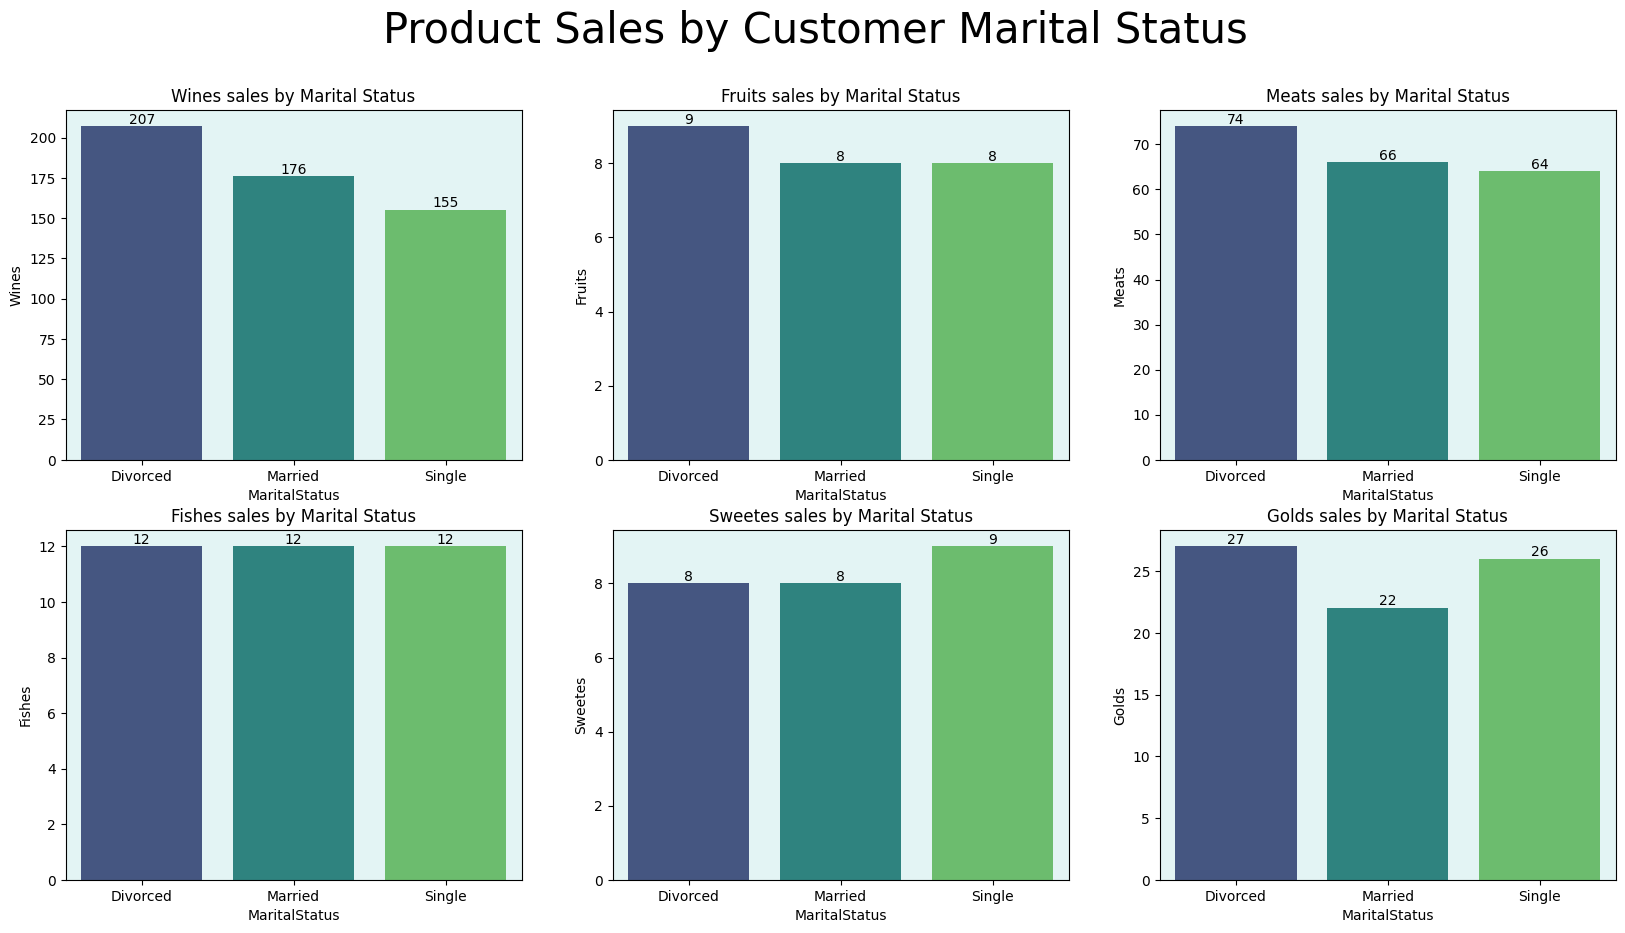

In [57]:
# informasi total pembelian setiap produk berdasarkan rentang usia dalam bentuk barplot
list_product = ['Wines', 'Fruits', 'Meats', 'Fishes', 'Sweetes', 'Golds']
id = 0
n_rows = 2
n_cols = 3
plt.figure(figsize=(20,10))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        ax = sns.barplot(data=df_marital, x='MaritalStatus', y = list_product[id], ci=0, estimator = 'median', palette='viridis')
        plt.title(f'{list_product[id]} sales by Marital Status')
        id += 1
        for i in ax.containers:
            ax.bar_label(i,)
            ax.set_facecolor('#E3F4F4')

plt.suptitle("Product Sales by Customer Marital Status",size = 30)
plt.show()

Dari grafik diatas dapat kita ambil kesimpulan :

Hampir semua panjualan produk Fishes berdasarakn status pernikahan memiliki perbedaan yang tidak signifikan, karena itu untuk segmentasi penjualan produk berdasarkan status perwakinan tidak bisa di gunakan sebagai acuan strategi marketing.

Penjualan Wines :
- Dilihat dari grafik, Penjualan produk wine paling banyak ada pada customer dengan Status Divorced dengan median 207.
- Ini bisa dibisa dijadikan dasar untuk membuat strategi marketing untuk menargetkan customer dengan Status Pernikahan Divorced untuk promosi produk wine selanjutnya.
- Customer dengan status single menjadi customer dengan nilai penjual terkecil.

Penjualan Fruits :
- Customer paling banyak membeli produk Fruits adalah customer dengan status divorced dengan nilai median 9.
- status single dan married sama-sama memiliki median yang sama yaitu 8.

Penjualan Meats :
- Penjualan Meats terbanyak ada pada customer berstatus divorced dengan nilai median 74.
- Customer dengan status single menjadi customer dengan penjualan Meats terkecil.

Penjualan Fishes :
- seluruh customer memiliki nilai median yang sama dalam pembelian produk fishes sebesar 18.

Penjualan Sweetes :
- Penjualan Sweetes terbanyak ada pada customer berstatus single dengan median sebesar 9.
- Ada kesamaan antara customer berstatus married dan divorced dengan pembelian sweetes di median 8.


Penjualan Golds :
- Produk Golds Paling banyak di beli oleh customer dengan status divorced dengan nilai median 27.
- Customer dengan status married memiliki pembelian terkecil.

Melihat bahwa ada beberpa grafik yang menunjukan perbedaan yang tidak jauh berbeda, maka akan dilakuakn uji hipotesis untuk mengetahui apakah median berbeda signifikan atau tidak.

Hipotesis :
- Ho : Median semua status pernikahan dengan penjualan produk sama
- Ha : Minimal ada satu median yang berbeda, tetapi kita tidak tau yang mana

In [58]:
# uji hipotesis menggunakan kruskal wallis
list_produk = ['Wines', 'Fruits', 'Meats', 'Fishes', 'Sweetes', 'Golds']
for i in list_produk:
    stat, pvalue = kruskal(
        df[df['MaritalStatus'] == 'Single'][i],
        df[df['MaritalStatus'] == 'Married'][i],
        df[df['MaritalStatus'] == 'Divorced'][i],
    )

    if pvalue > 0.05 :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal Menolak Ho.
    Median semua Status Pernikahan terhadap penjualan {i} TIDAK berbeda signifikan       
    ''')
    else :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua Status Pernikahan terhadap penjualan {i} berbeda signifikan
    ''')


    pvalue = 0.07744. pvalue > 0.05. Gagal Menolak Ho.
    Median semua Status Pernikahan terhadap penjualan Wines TIDAK berbeda signifikan       
    

    pvalue = 0.25320. pvalue > 0.05. Gagal Menolak Ho.
    Median semua Status Pernikahan terhadap penjualan Fruits TIDAK berbeda signifikan       
    

    pvalue = 0.72648. pvalue > 0.05. Gagal Menolak Ho.
    Median semua Status Pernikahan terhadap penjualan Meats TIDAK berbeda signifikan       
    

    pvalue = 0.64679. pvalue > 0.05. Gagal Menolak Ho.
    Median semua Status Pernikahan terhadap penjualan Fishes TIDAK berbeda signifikan       
    

    pvalue = 0.90107. pvalue > 0.05. Gagal Menolak Ho.
    Median semua Status Pernikahan terhadap penjualan Sweetes TIDAK berbeda signifikan       
    

    pvalue = 0.11514. pvalue > 0.05. Gagal Menolak Ho.
    Median semua Status Pernikahan terhadap penjualan Golds TIDAK berbeda signifikan       
    


 ### **Penjualan Berdasarkan Kelompok Umur Customer**

In [90]:
# Membuat tabel baru berdasarkan Kelompok Umur
dfspent_AgeGroup = df.groupby('AgeGroup')[['TotalSpent']].median().reset_index()
dfspent_AgeGroup.sort_values('TotalSpent', ascending=False)

,AgeGroup,TotalSpent
2,Lansia (51-75),605.0
1,Dewasa (36-50),290.0
0,Muda (18-35),175.0


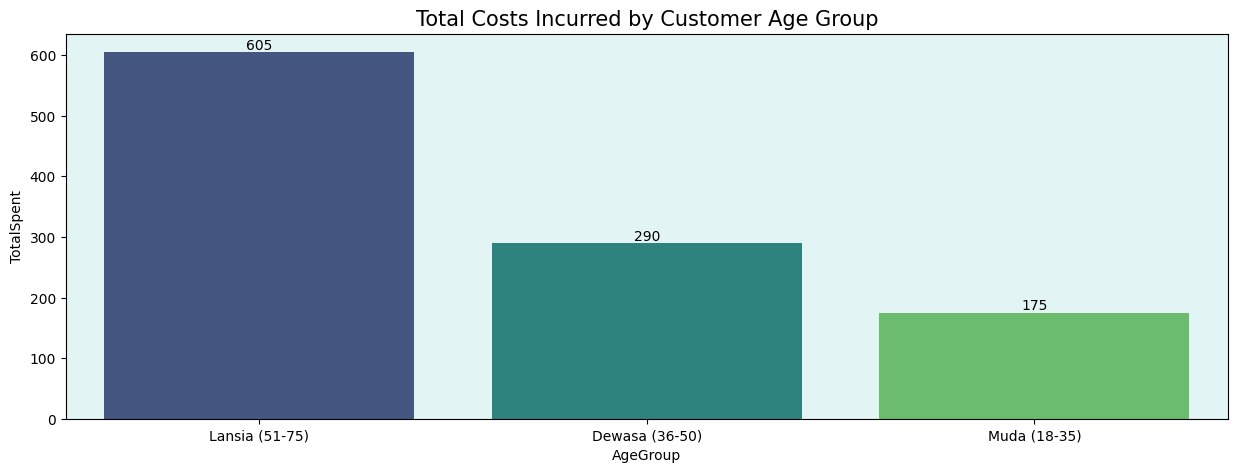

In [91]:
# visualisasi penjualan terbanyak berdasarkan Kelompok Umur

plt.figure(figsize=(15,5))
plt.title('Total Costs Incurred by Customer Age Group', size=15)
ax = sns.barplot(data =dfspent_AgeGroup, x='AgeGroup', y='TotalSpent', order=dfspent_AgeGroup.sort_values('TotalSpent', ascending=False).AgeGroup,palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)
    ax.set_facecolor('#E3F4F4')

Dari grafik diatas dapat diambil kesimpulan :

- Customer dengan kelompok umur Lansia merupakan customer yang paling besar berbelanja sebesar 605 dibandingkan customer dengan status yang berbeda
- Customer dengan kelompok usia Muda adalah customer dengan angka belanja paling sedikit dengan median 175.

Selanjutnya mari kita lihat persebaran pengeluaran customer berdasarkan produk.

In [61]:
df_Age = df.groupby('AgeGroup')[['Wines', 'Fruits', 'Meats', 'Fishes', 'Sweetes', 'Golds']].median().reset_index().round()
df_Age

,AgeGroup,Wines,Fruits,Meats,Fishes,Sweetes,Golds
0,Muda (18-35),56.0,10.0,54.0,14.0,10.0,21.0
1,Dewasa (36-50),138.0,6.0,52.0,10.0,7.0,21.0
2,Lansia (51-75),293.0,12.0,99.0,16.0,11.0,30.0


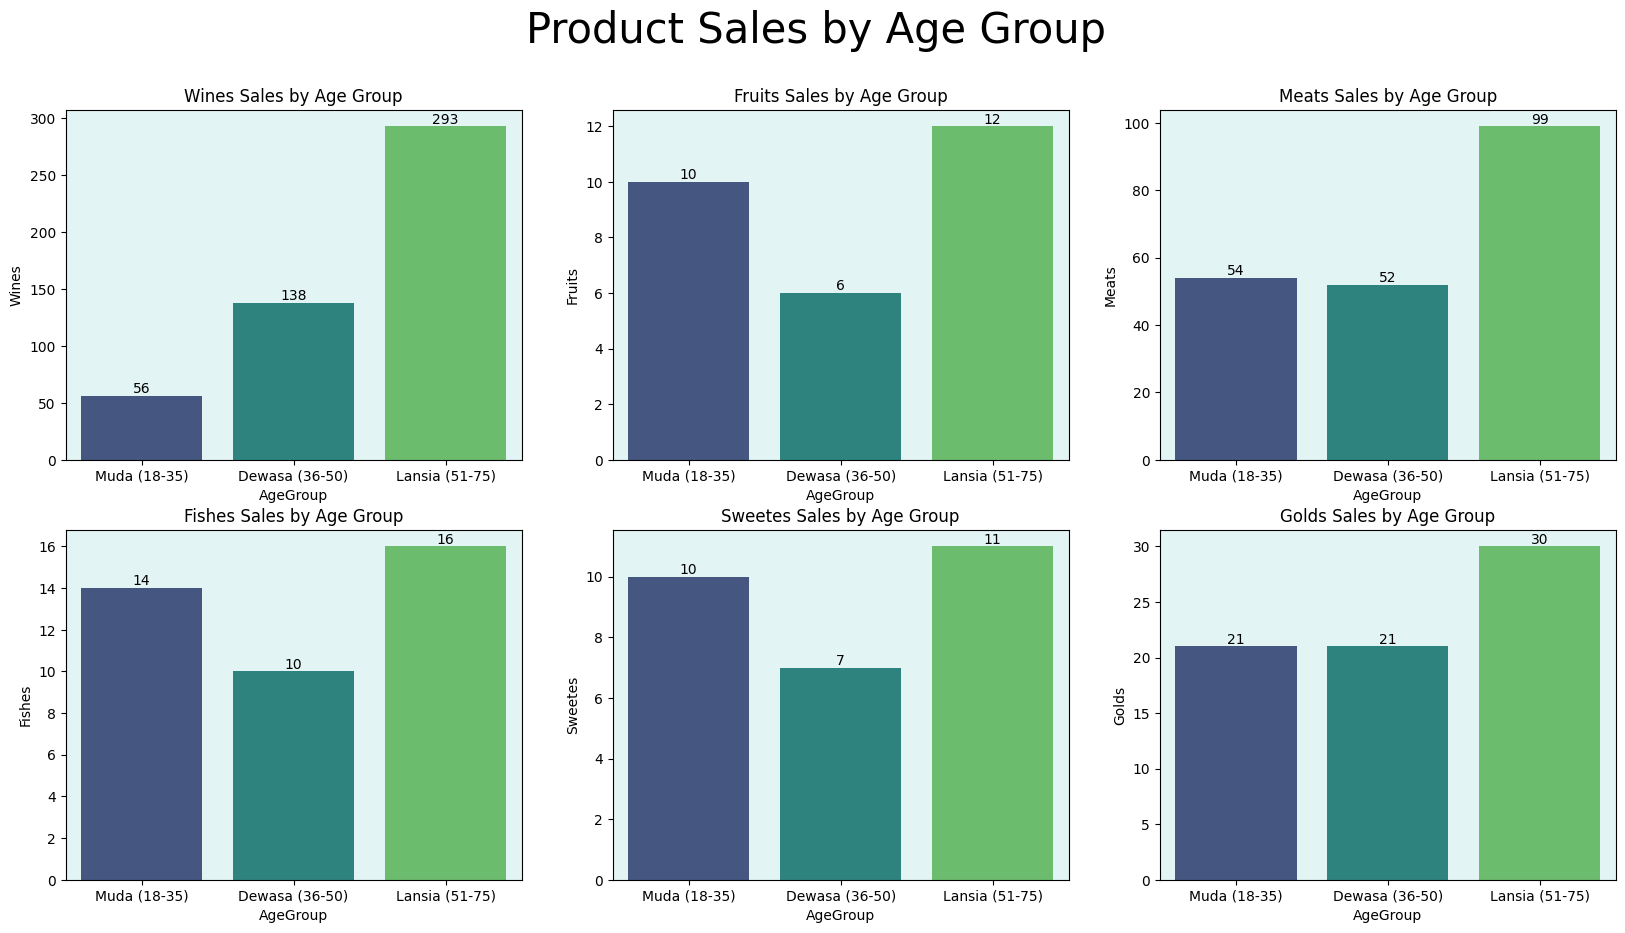

In [62]:
# informasi total pembelian setiap produk berdasarkan rentang usia dalam bentuk barplot
list_product = ['Wines', 'Fruits', 'Meats', 'Fishes', 'Sweetes', 'Golds']
id = 0
n_rows = 2
n_cols = 3
plt.figure(figsize=(20,10))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        ax = sns.barplot(data=df_Age, x='AgeGroup', y = list_product[id], ci=0, estimator = 'median', palette='viridis')
        plt.title(f'{list_product[id]} Sales by Age Group')
        id += 1
        for i in ax.containers:
            ax.bar_label(i,)
            ax.set_facecolor('#E3F4F4')

plt.suptitle("Product Sales by Age Group", size = 30)
plt.show()

Dari grafik diatas dapat kita ambil kesimpulan :

Semua panjualan produk tertinggi berada pada kelompok usia Lansia (51-75), dan memiliki data yang bervariasi, tentu lebih relevan untuk dijadikan dasar stratgi marketing dan promosi, untuk lebih jelasnya kita analisis satu per satu.

Penjualan Wines :
- Dilihat dari grafik, Penjualan produk wine paling banyak ada pada kelompok usia Lansia (51-75) dengan median 293.
- Ini bisa dibisa dijadikan dasar untuk membuat strategi marketing untuk menargetkan customer dengan pendidikan Post Graduate untuk promosi produk wine selanjutnya
- Customer kelompok usia muda(18-35) menjadi customer dengan nilai penjual terkecil.

Penjualan Fruits :
- Customer paling banyak membeli produk Fruits adalah customer dengan kelompok usia Lansia (51-75) dengan nilai median 12.
- Customer yang paling sedikit membeli produk Fruits adalah customer dengan kelompok usia Dewasa(36-50) dengan nilai median 4.

Penjualan Meats :
- Penjualan Meats terbanyak ada pada customer kelompok usia Lansia (51-75) dengan nilai median 99.
- Customer dengan kelompok usia Dewasa(36-50) menjadi customer dengan penjualan Meats terkecil.

Penjualan Fishes :
- Customer dengan kelompok usia Lansia (51-75) menjadi customer terbanyak yang membeli produk fishes dengan nilai median 16.
- Customer dengan kelompok usia Dewasa(36-50) adalah customer dengan pembelian terkecil untuk produk fishes.

Penjualan Sweetes :
- Penjualan Sweetes terbanyak ada pada customer kelompok usia Lansia (51-75) dengan median sebesar 11.
- Customer dengan nilai pembelian terkecil adalah customer dengan kelompok usia Dewasa(36-50)

Penjualan Golds :
- Produk Golds Paling banyak di beli oleh customer dengan kelompok usia Lansia (51-75) dengan nilai median 30.
- Ada kesamaan nilai median pada kelompok usia muda dan dewasa.

Melihat bahwa ada beberpa grafing yang menunjukan perbedaan yang tidak jauh berbeda, maka akan dilakuakn uji hipotesis untuk mengetahui apakah median berbeda signifikan atau tidak.

Hipotesis :
- Ho : Median semua kelompok usia dengan penjualan produk sama
- Ha : Minimal ada satu median yang berbeda, tetapi kita tidak tau yang mana

In [63]:
# uji hipotesis menggunakan kruskal wallis
list_produk = ['Wines', 'Fruits', 'Meats', 'Fishes', 'Sweetes', 'Golds']
for i in list_produk:
    stat, pvalue = kruskal(
        df[df['AgeGroup'] == 'Muda (18-35)'][i],
        df[df['AgeGroup'] == 'Lansia (51-75)'][i],
        df[df['AgeGroup'] == 'Dewasa (36-50)'][i],
    )

    if pvalue > 0.05 :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal Menolak Ho.
    Median semua kelompok Umur terhadap penjualan {i} TIDAK berbeda signifikan       
    ''')
    else :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua Kelompok Umur terhadap penjualan {i} berbeda signifikan
    ''')


    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua Kelompok Umur terhadap penjualan Wines berbeda signifikan
    

    pvalue = 0.00028. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua Kelompok Umur terhadap penjualan Fruits berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua Kelompok Umur terhadap penjualan Meats berbeda signifikan
    

    pvalue = 0.00026. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua Kelompok Umur terhadap penjualan Fishes berbeda signifikan
    

    pvalue = 0.00081. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua Kelompok Umur terhadap penjualan Sweetes berbeda signifikan
    

    pvalue = 0.00004. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua Kelompok Umur terhadap penjualan Golds berbeda signifikan
    


 ### **Penjualan Berdasarkan Tingkat Pendapatan Customer**

In [64]:
# Membuat tabel baru berdasarkan Kelompok Umur
dfspent_IncomeCategory = df.groupby('IncomeCategory')[['TotalSpent']].median().reset_index()
dfspent_IncomeCategory.sort_values('TotalSpent', ascending=False)

,IncomeCategory,TotalSpent
3,Very High,1724.0
2,High,1160.0
1,Mid,182.0
0,Low,49.0


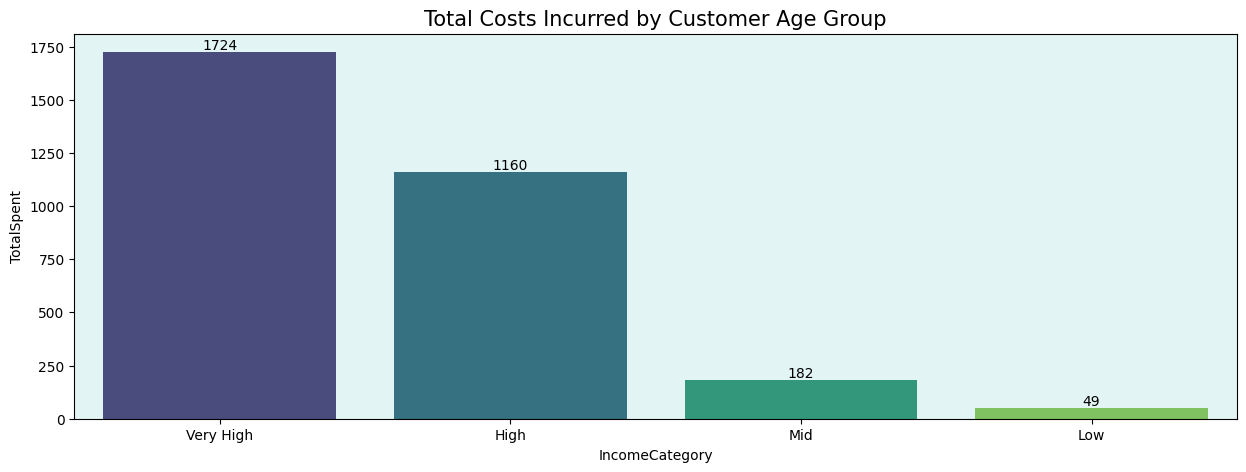

In [65]:
# visualisasi penjualan terbanyak berdasarkan Pendapatan Customer

plt.figure(figsize=(15,5))
plt.title('Total Costs Incurred by Customer Age Group', size=15)
ax = sns.barplot(data =dfspent_IncomeCategory, x='IncomeCategory', y='TotalSpent', order=dfspent_IncomeCategory.sort_values('TotalSpent', ascending=False).IncomeCategory,palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)
    ax.set_facecolor('#E3F4F4')

Dari grafik diatas dapat diambil kesimpulan :

- Customer dengan tingkat pendapatan Very High merupakan customer yang paling besar berbelanja sebesar 1724 dibandingkan customer dengan status yang berbeda
- Customer dengan tingkat pendapatan Low adalah customer dengan angka belanja paling sedikit dengan median 49.

Selanjutnya mari kita lihat persebaran pengeluaran customer berdasarkan produk.

In [66]:
df_Income = df.groupby('IncomeCategory')[['Wines', 'Fruits', 'Meats', 'Fishes', 'Sweetes', 'Golds']].median().reset_index().round()
df_Income

,IncomeCategory,Wines,Fruits,Meats,Fishes,Sweetes,Golds
0,Low,7.0,3.0,11.0,4.0,3.0,10.0
1,Mid,81.0,3.0,32.0,6.0,3.0,17.0
2,High,538.0,37.0,300.0,58.0,38.0,53.0
3,Very High,770.0,31.0,711.0,76.0,63.0,38.0


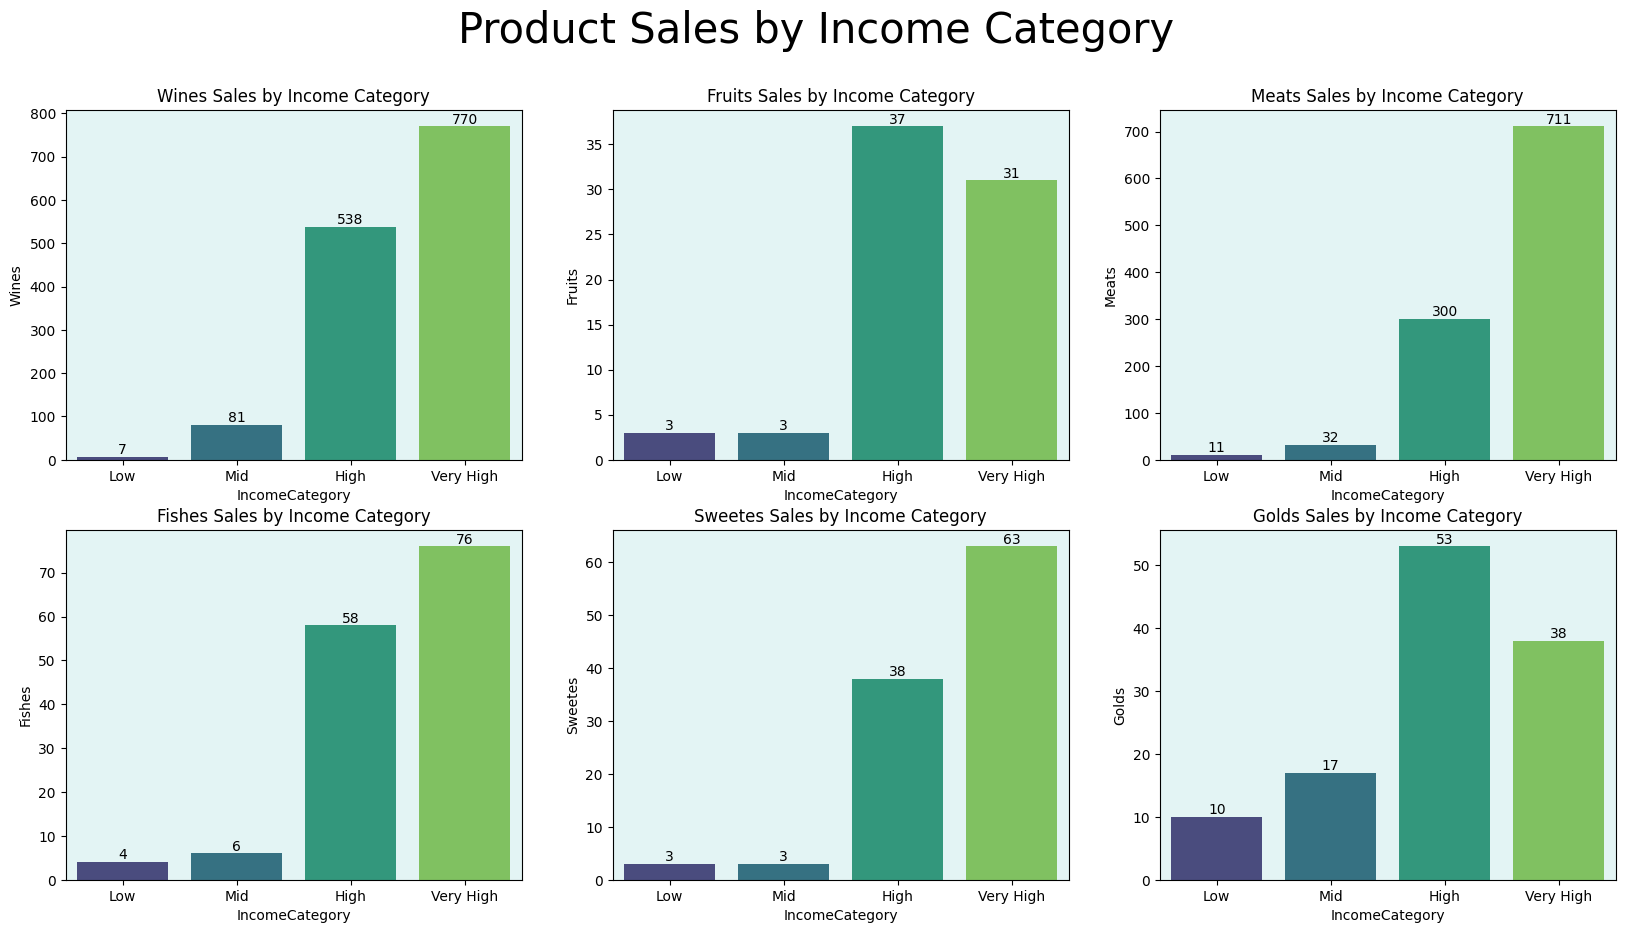

In [67]:
# informasi total pembelian setiap produk berdasarkan rentang usia dalam bentuk barplot
list_product = ['Wines', 'Fruits', 'Meats', 'Fishes', 'Sweetes', 'Golds']
id = 0
n_rows = 2
n_cols = 3
plt.figure(figsize=(20,10))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        ax = sns.barplot(data=df_Income, x='IncomeCategory', y = list_product[id], ci=0, estimator = 'median', palette='viridis')
        plt.title(f'{list_product[id]} Sales by Income Category')
        id += 1
        for i in ax.containers:
            ax.bar_label(i,)
            ax.set_facecolor('#E3F4F4')

plt.suptitle("Product Sales by Income Category", size = 30)
plt.show()

Dari grafik diatas dapat kita ambil kesimpulan :

hampir Semua panjualan produk tertinggi berada pada customer dengan tingkat pendapatan very high, dan memiliki data yang bervariasi, tentu lebih relevan untuk dijadikan dasar straetgi marketing dan promosi, untuk lebih jelasnya kita analisis satu per satu.

Penjualan Wines :
- Dilihat dari grafik, Penjualan produk wine paling banyak ada pada customer dengan tingkat pendapatan very high dengan median 710.
- Ini bisa dibisa dijadikan dasar untuk membuat strategi marketing untuk menargetkan customer dengan pendidikan Post Graduate untuk promosi produk wine selanjutnya
- Customer dengan tingkat pendapatan low menjadi customer dengan nilai penjual terkecil.

Penjualan Fruits :
- Customer paling banyak membeli produk Fruits adalah customer dengan customer dengan tingkat pendapatan high dengan nilai median 37.
- Ada kesamaan nilai median antara customer dengan tingkat pendapatan low dan mid.

Penjualan Meats :
- Penjualan Meats terbanyak ada pada customer dengan tingkat pendapatan very high dengan nilai median 711.
- Customer dengan tingkat pendapatan low menjadi customer dengan penjualan Meats terkecil.

Penjualan Fishes :
- Customer dengan tingkat pendapatan Very High menjadi customer terbanyak yang membeli produk fishes dengan nilai median 76.
- Customer dengan tingkat pendapatan low adalah customer dengan pembelian terkecil untuk produk fishes.

Penjualan Sweetes :
- Penjualan Sweetes terbanyak ada pada customer dengan tingkat pendapatan Very high dengan median sebesar 63.
- Ada kesamaan antara tingkat pendapatan low dan mid.

Penjualan Golds :
- Produk Golds Paling banyak di beli oleh customer dengan customer dengan tingkat pendapatan high dengan nilai median 53.
- Customer dengan tingkat pendapatan low menjadi yang terkecil dengan median 10

Melihat bahwa ada beberpa grafik yang menunjukan perbedaan yang tidak jauh berbeda, maka akan dilakukan uji hipotesis untuk mengetahui apakah median berbeda signifikan atau tidak.

Hipotesis :
- Ho : Median semua kelompok usia dengan penjualan produk sama
- Ha : Minimal ada satu median yang berbeda, tetapi kita tidak tau yang mana

In [68]:
# uji hipotesis menggunakan kruskal wallis
list_produk = ['Wines', 'Fruits', 'Meats', 'Fishes', 'Sweetes', 'Golds']
for i in list_produk:
    stat, pvalue = kruskal(
        df[df['IncomeCategory'] == 'Low'][i],
        df[df['IncomeCategory'] == 'Mid'][i],
        df[df['IncomeCategory'] == 'High'][i],
        df[df['IncomeCategory'] == 'Very High'][i]
    )

    if pvalue > 0.05 :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal Menolak Ho.
    Median semua Tingkat Pendapatan terhadap penjualan {i} TIDAK berbeda signifikan       
    ''')
    else :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua Tingkat Pendapatan terhadap penjualan {i} berbeda signifikan
    ''')


    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua Tingkat Pendapatan terhadap penjualan Wines berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua Tingkat Pendapatan terhadap penjualan Fruits berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua Tingkat Pendapatan terhadap penjualan Meats berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua Tingkat Pendapatan terhadap penjualan Fishes berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua Tingkat Pendapatan terhadap penjualan Sweetes berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua Tingkat Pendapatan terhadap penjualan Golds berbeda signifikan
    


Setelah kita melakukan pemetaan penjualan berdasarkan karakteristik customer dapat di tarik kesimpulan :

- Penjualan tertinggi ada pada produk wine dengan total 680029
- Penjualan produk terendah ada pada produk Fruits dengan total 58753

Penjualan Berdasarkan Pendidikan

- Customer dengan pendidikan Post Graduate merupakan customer yang paling besar berbelanja sebesar 493 dibandingkan customer dengan pendidikan yang berbeda
- Customer dengan pendidikan Primary School adalah customer dengan angka belanja paling sedikit dengan median 57.
- Memiliki sebaran data yang bervariasi (Perbedaan signifikan) sehingga dapat dijadikan acuan untuk strategi marketing dan promosi. 

Penjualan Berdasarkan Status Pernikahan :

- Customer dengan Status Divorced merupakan customer yang paling besar berbelanja sebesar 503 dibandingkan customer dengan status yang berbeda
- Customer dengan pendidikan Single adalah customer dengan angka belanja paling sedikit dengan median 369.
- Memiliki sebaran data yang kurang bervariasi (Perbedaan tidak signifikan) sehingga tidak dapat dijadikan acuan untuk strategi marketing dan promosi. 

Penjualan Berdasarkan Kelompok Usia :

- Customer dengan kelompok umur Lansia merupakan customer yang paling besar berbelanja sebesar 605 dibandingkan customer dengan status yang berbeda
- Customer dengan kelompok usia Muda adalah customer dengan angka belanja paling sedikit dengan median 175.
- Memiliki sebaran data yang bervariasi (Perbedaan signifikan) sehingga dapat dijadikan acuan untuk strategi marketing dan promosi. 

Penjualan Berdasarkan Kelompok Usia :

- Customer dengan tingkat pendapatan Very High merupakan customer yang paling besar berbelanja sebesar 1724 dibandingkan customer dengan status yang berbeda
- Customer dengan tingkat pendapatan Low adalah customer dengan angka belanja paling sedikit dengan median 49.
- Memiliki sebaran data yang bervariasi (Perbedaan signifikan) sehingga dapat dijadikan acuan untuk strategi marketing dan promosi.

## **`3. Efektifitas Kampanye Yang di Terima Customer Dengan Tingkat Penjualan Produk`**

In [69]:
df_campaign = df[['AcptCmp1','AcptCmp2','AcptCmp3','AcptCmp4','AcptCmp5','Response']].sum().sort_values(ascending=False)
df_campaign

Response    334
AcptCmp4    167
AcptCmp3    163
AcptCmp5    162
AcptCmp1    144
AcptCmp2    30 
dtype: int64

In [70]:
df_campaign = pd.DataFrame({
    'Campaign' : ['Response','AcpCmp4','AcptCmp3','AcptCmp5','AcptCmp1','AcpCmp2'],
    'Customer' : [334,167,163,162,144,30]
})
df_campaign

,Campaign,Customer
0,Response,334
1,AcpCmp4,167
2,AcptCmp3,163
3,AcptCmp5,162
4,AcptCmp1,144
5,AcpCmp2,30


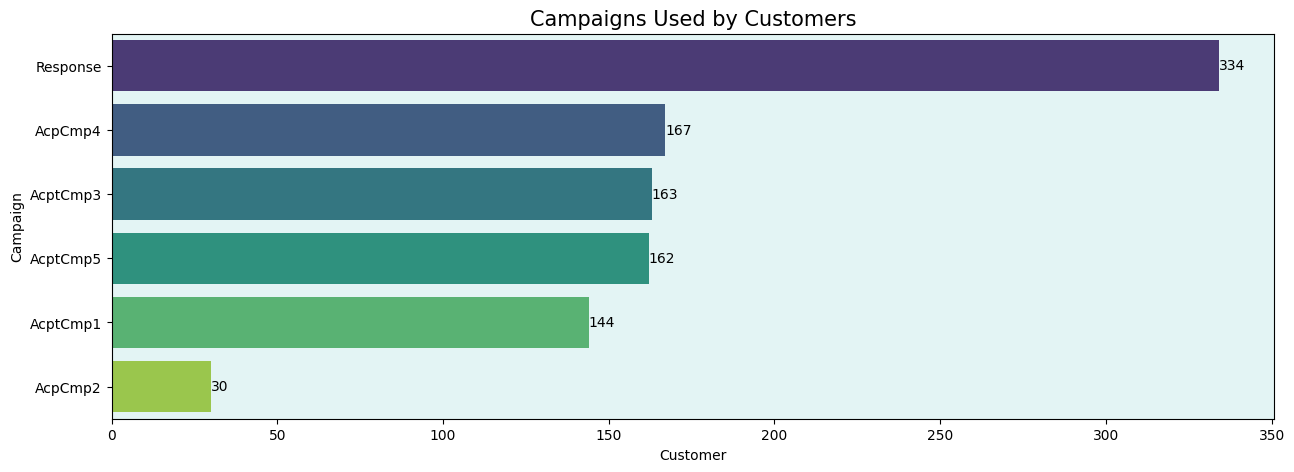

In [71]:
plt.figure(figsize=(15,5))
plt.title('Campaigns Used by Customers', size=15)
ax = sns.barplot(df_campaign, x='Customer', y='Campaign', order=df_campaign.Campaign, palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)
    ax.set_facecolor('#E3F4F4')

Dari grafik dapat kita simpulkan :

- Sebagian besar customer menggunakan campaign terakhir sebesar 334 orang
- Campaign yang paling sedikit adalah campaign ke 2 sebesar 30 orang

Selanjutnya mari kita lihat revenue dari setiap campaign.

In [72]:
rev_campaign = df.groupby('TotalAcptCmp')[['TotalSpent']].median().reset_index()
rev_campaign

,TotalAcptCmp,TotalSpent
0,0,255.5
1,1,1178.0
2,2,731.5
3,3,1631.0
4,4,1750.0
5,5,1189.0


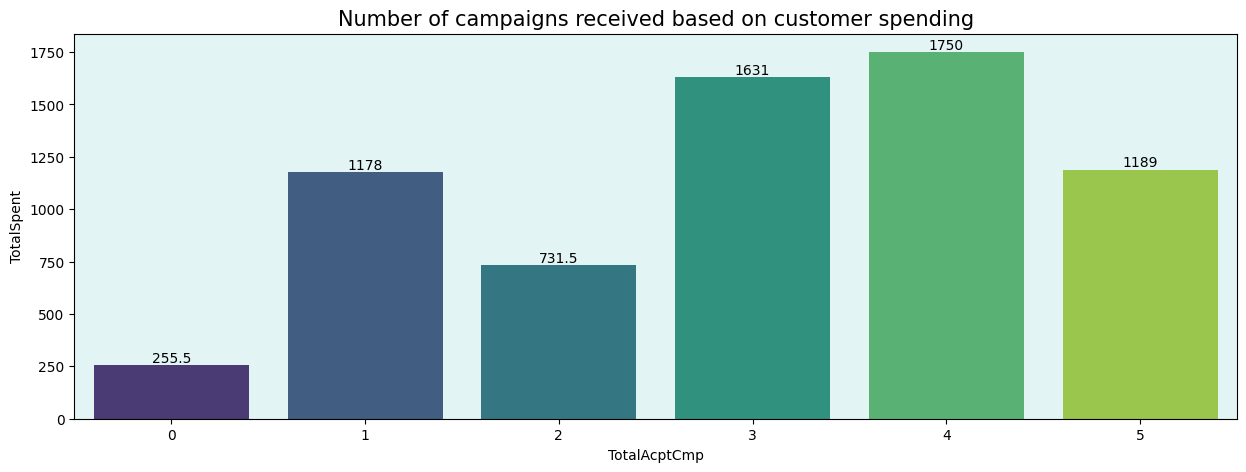

In [73]:
plt.figure(figsize=(15,5))
plt.title('Number of campaigns received based on customer spending', size=15)
plt.ylabel('Median total spent')
ax = sns.barplot(rev_campaign, x='TotalAcptCmp', y='TotalSpent', ci=0, estimator='median',palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)
    ax.set_facecolor('#E3F4F4')

Dari grafik diatas kita dapat kita simpulkan :

- Semakin banyak customer menerima campaign, semakin besar belanja customer.
- sekitar 225 orang tidak pernah menggunakan campaign yang diterima.

Selanjutnya mari kita lihat penyebaran campaign berdasarkan produk dan penjualan.

In [74]:
# Melihat campaign yang paling banyak di gunakan customers
df_campaign = df.groupby('TotalAcptCmp')[['Wines','Fruits', 'Meats', 'Fishes', 'Sweetes', 'Golds']].median().sort_values('TotalAcptCmp').reset_index()
df_campaign

,TotalAcptCmp,Wines,Fruits,Meats,Fishes,Sweetes,Golds
0,0,104.0,7.0,49.0,10.0,7.0,20.0
1,1,581.0,22.0,257.0,33.0,27.0,38.0
2,2,409.5,9.0,100.0,11.0,11.0,35.5
3,3,918.0,32.0,454.0,61.0,44.0,63.0
4,4,966.0,27.0,349.0,52.0,69.0,62.0
5,5,1060.0,28.0,818.0,0.0,20.0,56.0


In [75]:
# Mengubah struktur kolom
dfcampaign = pd.melt(df_campaign, id_vars=['TotalAcptCmp'], value_vars=['Wines','Fruits', 'Meats', 'Fishes', 'Sweetes', 'Golds'])
dfcampaign = dfcampaign.groupby(['TotalAcptCmp','variable'])[['value']].sum().reset_index().rename(columns={'value' : 'total','variable': 'produk'})


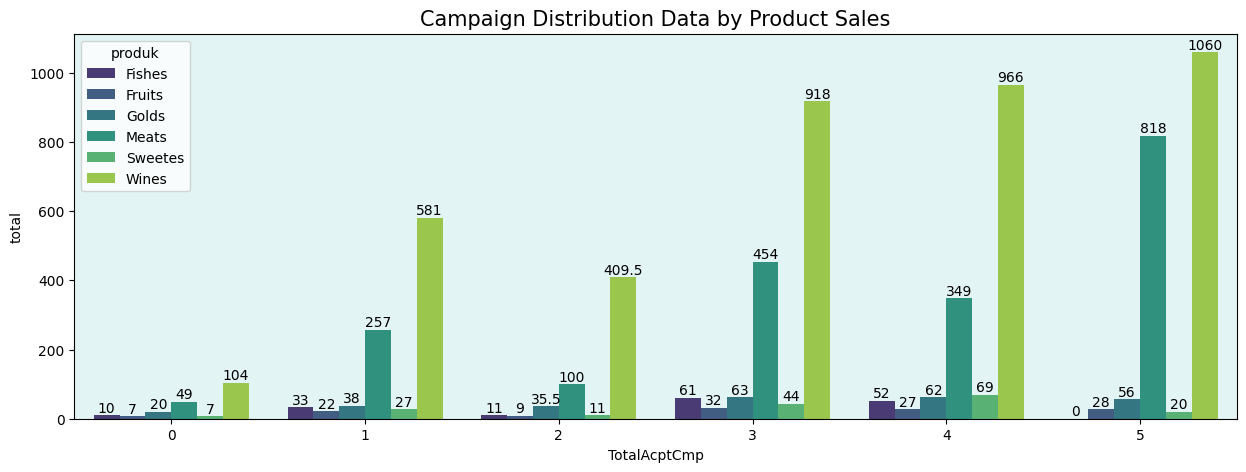

In [76]:
plt.figure(figsize=(15,5))
plt.title('Campaign Distribution Data by Product Sales', size=15)
plt.ylabel('Median Wines')
ax = sns.barplot(data=dfcampaign, x='TotalAcptCmp', y='total',hue='produk',palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)
    ax.set_facecolor('#E3F4F4')

Dari grafik diatas dapat disimpulkan :

- Semua campaign tertinggi ada pada produk wine.
- Tertinggi kedua ada pada produk meals
- ini bisa menjadi dasar untuk penentuan campaign selanjutnya dan menambahkan revenue berdasarkan penjualan yang menggunakan campaign.
- Terlihat ada beberapa produk yang memiliki perbedaan yang tidak jauh berbeda, maka akan dilakukan uji hipotesis untuk mengetahui apakah median berbeda signifikan atau tidak.

Hipotesis :

- Ho : Median semua produk dengan campaign sama
- Ha : Minimal ada satu median yang berbeda, tetapi kita tidak tau yang mana

In [77]:
# List of products
list_produk = ['Wines', 'Fruits', 'Meats', 'Fishes', 'Sweetes', 'Golds']

# Membuat DataFrame
dfcampaign = pd.DataFrame({
    'TotalAcptCmp': [0, 1, 2, 3, 4, 5],
    'Wines': [104, 581, 409.5, 918, 966, 1060],
    'Fruits': [7, 22, 9, 32, 27, 28],
    'Meats': [49, 257, 100, 454, 349, 818],
    'Fishes': [10, 33, 11, 61, 52, 0],
    'Sweetes': [7, 27, 11, 44, 69, 20],
    'Golds': [20, 38, 35.5, 63, 62, 56]
})

# Loop through products
for i in list_produk:
    stat, pvalue = kruskal(
        dfcampaign[dfcampaign['TotalAcptCmp'] == 0][i],
        dfcampaign[dfcampaign['TotalAcptCmp'] == 1][i],
        dfcampaign[dfcampaign['TotalAcptCmp'] == 2][i],
        dfcampaign[dfcampaign['TotalAcptCmp'] == 3][i],
        dfcampaign[dfcampaign['TotalAcptCmp'] == 4][i],
        dfcampaign[dfcampaign['TotalAcptCmp'] == 5][i]
    )

    if pvalue > 0.05:
        print(f'''
        pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal Menolak Ho.
        Median Jumlah campaign terhadap penjualan produk {i} TIDAK berbeda signifikan       
        ''')
    else:
        print(f'''
        pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil Menolak Ho.       
        Median Jumlah campaign terhadap penjualan produk {i} berbeda signifikan
        ''')



        pvalue = 0.41588. pvalue > 0.05. Gagal Menolak Ho.
        Median Jumlah campaign terhadap penjualan produk Wines TIDAK berbeda signifikan       
        

        pvalue = 0.41588. pvalue > 0.05. Gagal Menolak Ho.
        Median Jumlah campaign terhadap penjualan produk Fruits TIDAK berbeda signifikan       
        

        pvalue = 0.41588. pvalue > 0.05. Gagal Menolak Ho.
        Median Jumlah campaign terhadap penjualan produk Meats TIDAK berbeda signifikan       
        

        pvalue = 0.41588. pvalue > 0.05. Gagal Menolak Ho.
        Median Jumlah campaign terhadap penjualan produk Fishes TIDAK berbeda signifikan       
        

        pvalue = 0.41588. pvalue > 0.05. Gagal Menolak Ho.
        Median Jumlah campaign terhadap penjualan produk Sweetes TIDAK berbeda signifikan       
        

        pvalue = 0.41588. pvalue > 0.05. Gagal Menolak Ho.
        Median Jumlah campaign terhadap penjualan produk Golds TIDAK berbeda signifikan       
        


## **`4. Metode Penjualan Paling Banyak Digunakan Customer`**

In [78]:
df_channel = df[['WebPurchases', 'CatalogPurchases', 'StorePurchases']].sum()
df_channel

WebPurchases        9140 
CatalogPurchases    5955 
StorePurchases      12959
dtype: int64

In [79]:
df_metode = pd.DataFrame({
    'Metode' : ['StorePurchases', 'CatalogPurchases', 'WebPurchases'],
    'Total' : [12959, 9140, 5955]
})
df_metode

,Metode,Total
0,StorePurchases,12959
1,CatalogPurchases,9140
2,WebPurchases,5955


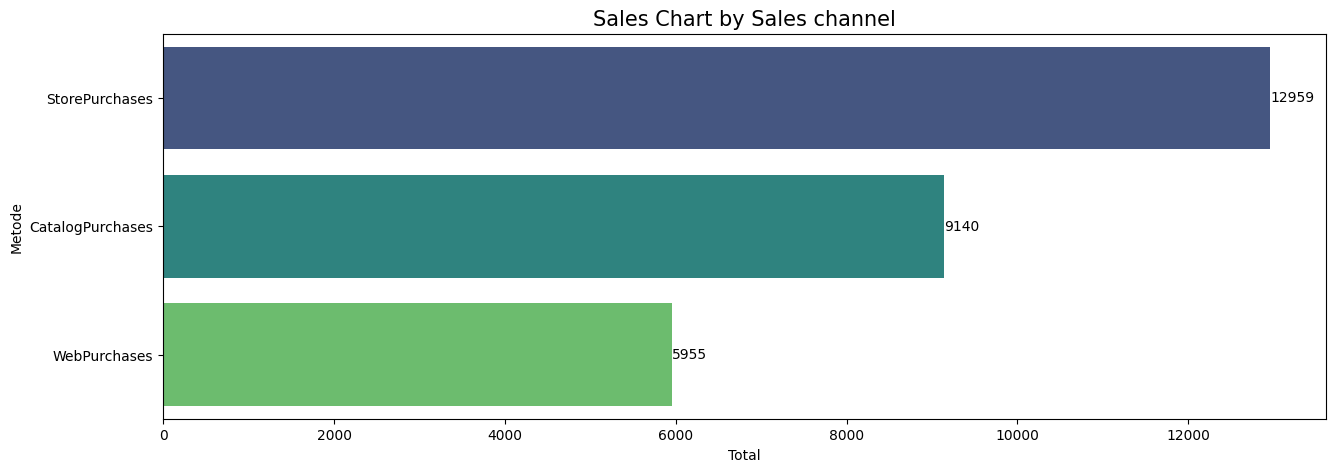

In [80]:
plt.figure(figsize=(15,5))
plt.title('Sales Chart by Sales channel', size=15)
ax = sns.barplot(df_metode, x='Total', y='Metode', palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)

Dari grafik di atas dapat kita simpulkan bahwa penjualan banyak terjadi secara langsung ke supermarket sebesar 12959, dan penjualan melalui website masih sangat kecil dengan nilai 5955. selanjutnya mari kita lihat persebaran produk berdasarkan karakteristik customer.

**Metode Penjualan Berdasarkan Income**

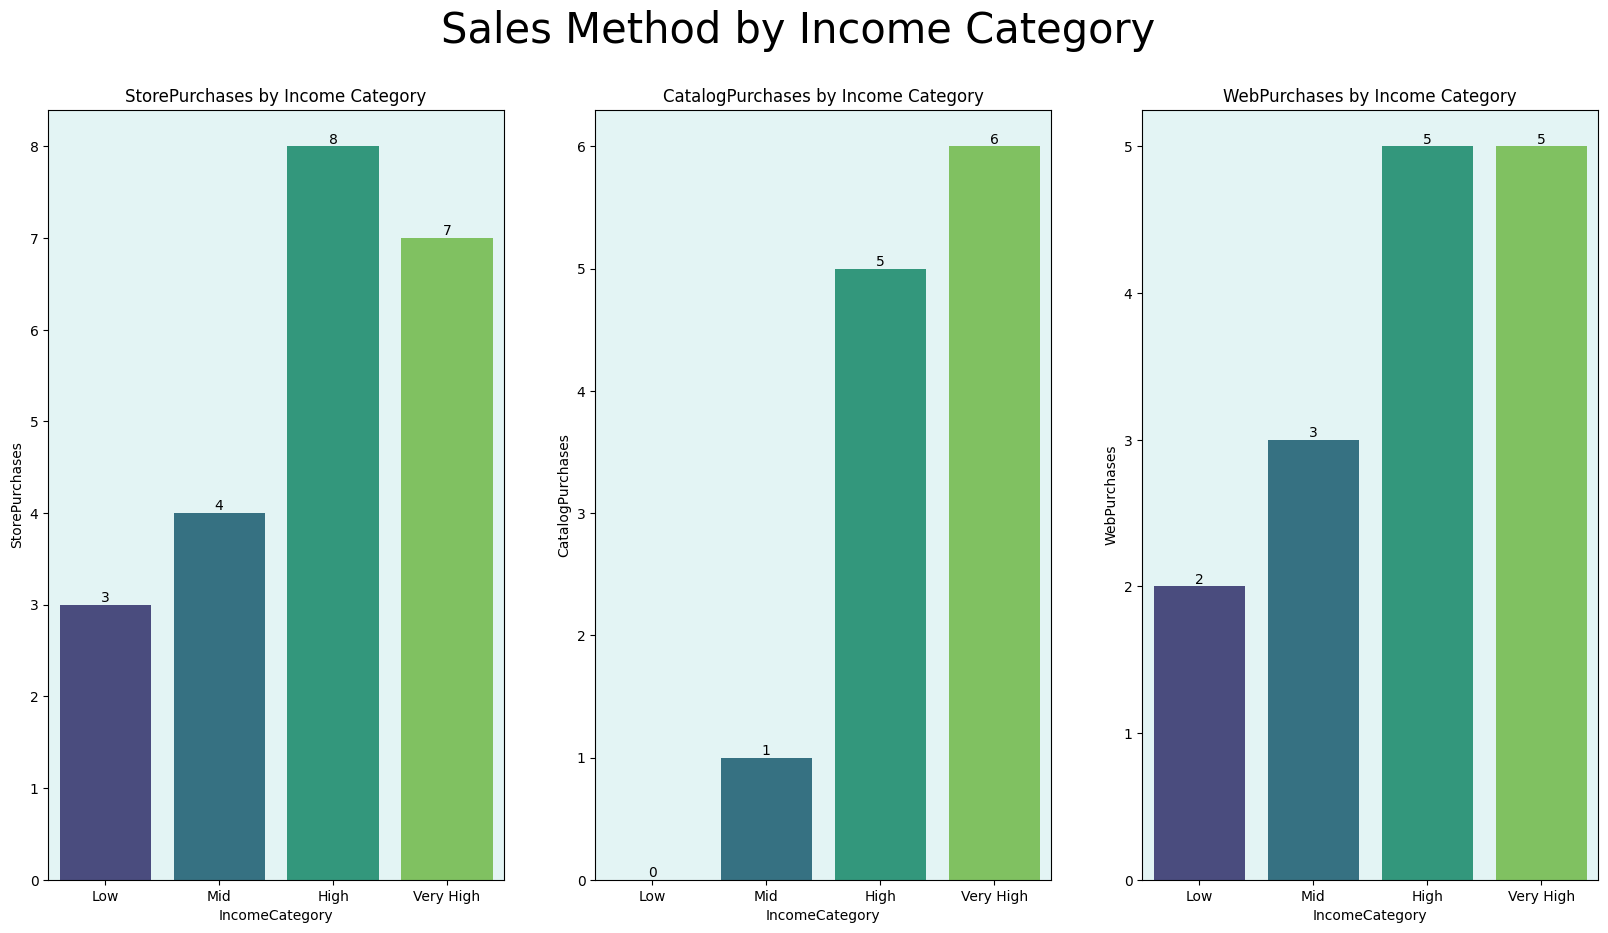

In [81]:
# informasi metode penjualan berdasarkan tingkat pendapatan dalam bentuk barplot
list_metode = ['StorePurchases', 'CatalogPurchases', 'WebPurchases']
id = 0
n_rows = 1
n_cols = 3
plt.figure(figsize=(20,10))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        ax = sns.barplot(data=df, x='IncomeCategory', y = list_metode[id], ci=0, estimator = 'median', palette='viridis')
        plt.title(f'{list_metode[id]} by Income Category')
        id += 1
        for i in ax.containers:
            ax.bar_label(i,)
            ax.set_facecolor('#E3F4F4')

plt.suptitle("Sales Method by Income Category", size = 30)
plt.show()

Dari grafik diatas menunjukan bahwa :
- pelanggan dengan pendapatan tinggi dan sangat tinggi menjadi kontributor utama untuk ketiga metode pembelian baik di toko, katalog maupun melalui website.
- Customer dengan tingkat pendapatan High lebih sering berbelanja dengan datang langsung ke supermarket dibandingkan dengan tingkat pendapatan lainnya.
- Customer dengan pendapatan Very High lebih sering menggunakan Catalog dalam metode belanja mereka.
- Ada kesamaan antara customer dengan tingkat pendapatan High dan very high dalam menggunakan website untuk media belanja.
- Hasil ini penting bagi strategi marketing dalam memutuskan penggunaan metode belanja customer.

## **Kesimpulan**

Analisis terhadap dataset pelanggan supermarket telah memberikan wawasan yang berharga tentang berbagai aspek perilaku pelanggan, preferensi pembelian, dan konsumsi produk. Temuan ini menawarkan wawasan yang dapat ditindaklanjuti yang dapat memandu strategi pemasaran dan pengambilan keputusan untuk meningkatkan penjualan berdasarkan produk laris dan metode pembayaran. 

Dengan demikian, hal ini dapat secara signifikan berdampak pada kesuksesan bisnis secara keseluruhan dan membantu kita menjawab rumusan masalah yang telah kita buat sebelumnya :

**1. Demografi Custoemr**

- Sebagian besar customer berlatar pendidikan Graduate, Master dan Post Graduate
- Sebagian besar customer berada di kelompok usia Dewasa dan Lansia
- Customer paling banyak adalah customer yang sudah menikah (married), perbedaan sangat signifikan dibandingkan dengan customer yang single dan divorced
- Sebagian besar berpenghasilan mid dan tinggi
- Ini membuktikan bahwa kemampuan belanja cukup besar.

**2. Penjualan Produk Berdasarkan Karakteristik Pengunjung**
- Penjualan tertinggi ada pada produk wine dengan total 680029
- Penjualan tertinggi kedua ada pada produk meat dengan total 373375
- Penjualan produk terendah ada pada produk Fruits dengan total 58753
- Customer yang paling banyak berbelanja adalah berpendidikan Graduate  hampir di semua produk kecuali produk wine dengan customer terbanyak berpendidikan Post Graduate dengan median sebesar 269.
- Customer dengan kelompok umur Lansia merupakan customer yang paling besar berbelanja sebesar 605 dibandingkan customer lainnya.
- Kelompok lansia paling banyak berblanja produk wines. dibanding dengan produk lainnya.
- Tingkat Pendapatan customer paling banyak ada pada tingkat pendapatan very high
- Customer dengan tingkat pendapatan sangat tinggi paling sering berbelanja wines dibanding tingkat pendapatan lainya
- Produk Meats paling banyak dibeli oleh customer berpendapatan sangat tinggi, berbeda signifikan dibanding dengan customer lainnya

**3. Bagaimana pengaruh promosi terhadap penjualan?**
- Secara garis besar tidak banyak customer yang menggunakan campaign yang dikeluarkan oleh super market, namun demikian. masih ada customer yang menggunakan campaign promo untuk berbelanja.
- Campaign terakhir adalah campaign yang paling banyak menarik custoemr sebesar 344 orang
- Sebagian besar promo digunakan untuk membeli wines  yang kedua adalah meat


**4. Metode Penjualan Yang paling Banyak Digunakan Customer**
- Metode belanja melalui toko menjadi pilihan kebanyakan custoemr dengan mendatangkan revenue sebesar 12595.
- Penjualan melalui website menjadi pilihan terakhir customer dengan memberikan revenue sebesar 5955. 



## **Rekomendasi**

Setelah kita melakukan analisis secara mendalam pada data selama 2 tahun terakhir. Kita bisa menilai bahwa perilaku belanja customer dipengaruh oleh beberapa faktor, yaitu Usia, pendidikan dan pendapatan. Dari kesemua faktor tersebut faktor penghasilan yang menurut kami memberikan relevansi kuat terhadap perilaku konsuntif costumer, semakin tinggi penghasilan customer maka semakin tinggi juga tingkat belanja customer.

Dan dari hasil analisis juga kita mendapatkan gambaran secara keseluruhan untuk menentukan target costumer dan produk yang bisa ditawarkan . sehingga bisa meningkatkan penjualan secara exponensial. Adapun beberapa buyer persona yang bisa dijadikan acuan untuk campaign selanjutnya.

- Produk wine yang paling relevan Usia Dewasa dan Lansia berpenghasilan high dan very high dengan latar pendidikan graduate dan post graduate paling relevan sebagai target market untuk promosi produk wine, karena sebagian besar pembelian melalui toko, bisa menambahkan strategi penjualan berupa up selling dan bundling.

- Target custoemr yang relevan untuk produk meat adalah customer dengan kelompok usia lansia berpenghasilan high dan very high dengan pendidikan hampir semua dan memiliki status menikah maupun divorced, kita bisa menggunakan catalog sebagai metode pembayaran. Dengan memberikan brosur dan juga kupon potongan harga untuk produk lainnya. 

- Karena dinilai penjualan melalui web belum terlalu optimal, ada beberapa opsi untuk meningkatkan penjualan melalui website. 
    1. Membangun customer database dengan memberikan kupon potongan harga untuk setiap pembelian melalui website sebagai leads magnet dengan cara mengisi nama dan email customer. Sehingga kita bisa membangun CRM melalui email customer untuk memberikan campaign promo khusus transaksi melalui website.
    2. Membuat iklan di sosial media dengan target area sekitar untuk meningkatkan traffic kedalam website.
    3. Menambahkan fitur pesan antar untuk radius yang sekiranya masih terjangkau untuk optimasi penjualan melalui website sehingga memudahkan customer untuk berbelanja.
      